In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('albion_on_paper_and_metabs_30-3_4.csv')

df = df.replace({',': '.'}, regex=True)

def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return val  # Return the value as-is if it can't be converted to float

# Apply the function element-wise to the DataFrame
df = df.applymap(convert_to_float)

object_columns = df.select_dtypes(include='object').columns
print(object_columns)


X=df.drop(columns=['DIAGNOSIS'])
y=df['DIAGNOSIS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1066)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("classifier finished")


    
#print accuracy
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


from model import Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split,RepeatedKFold,StratifiedShuffleSplit

from collections import Counter
Counts=Counter()
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)
for i in range(0,10000):
    metas=list(X_train_scaled.columns)

    Xtrain=X_train_scaled.values
    Xtest=X_test_scaled.values
    class ArgsClass:
        def __init__(self,k=5,alpha=0.05):
            self.k=k 
            self.alpha=alpha
    args=ArgsClass(k=30,alpha=0.005)
    sel=Selection("lasso",args)
    sel.fit(Xtrain,y_train)
    mb=sel.mb_
    Counts=Counter(mb)+Counts

Counts_metas=pd.DataFrame(Counts.most_common(),columns=['metas_index','counts'])
Counts_metas['metas'] = Counts_metas.apply(lambda a:metas[a['metas_index']],axis=1)
selected_feature_index=list(Counts_metas['metas_index'][0:10])
print(selected_feature_index)

s=[]
s1=[]
model = RF(n_estimators=100,random_state=12306)
model.fit(Xtrain[:,Counts_metas['metas_index'][0:10]], y_train)
pred = model.predict(Xtest[:,Counts_metas['metas_index'][0:10]])
prob = model.predict_proba(Xtest[:,Counts_metas['metas_index'][0:10]])
print("ytest,pred:",y_test,pred)
s.append(f1_score(y_test, pred))
print("ytest,prob:",y_test,prob[:,-1])
s1.append(roc_auc_score(y_test, prob[:,-1]))
print("f1 score:", s)
print("auroc score:", s1)

In [ ]:
column_names = df.columns[selected_feature_index].tolist()
print(column_names)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
rf = RandomForestClassifier(n_estimators=100, random_state=42)
df2=pd.read_csv('heliad_on_paper_and_metabs_2.csv')
X=df2.drop(columns=['G21'])
y=df2['G21']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1066)

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Fit model on entire dataset for feature importance
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': [f'Feature {i}' for i in range(X.shape[1])],
    'Importance': importances
})

# Sort by importance and print top 20
top_20 = importance_df.sort_values(by='Importance', ascending=False).head(20)
print(top_20)

In [ ]:
X_df2=pd.DataFrame(X)

In [ ]:
X_df2

In [ ]:
indices=[614,615,14,616,492,376,359,594,408,404,365,23,415,596,457,349,318,8,31,505]
column_names = df2.columns[indices].to_list()
print(column_names)

In [ ]:
indices=[620,619,618,378,448,274,72,433,244,340,459,409,256,473,10,493,111,485,466,335]
column_names = X.columns[indices].tolist()
print(column_names)

In [ ]:
df2=pd.read_csv('heliad_on_paper_and_metabs_2.csv')
df2.shape

In [ ]:
df1=pd.read_csv('albion_on_paper_and_metabs_30-3_4.csv')
df1=df1.drop(columns=['SCC12','HADS_D1'])

In [ ]:
df1.shape

In [ ]:
df2.shape

In [ ]:
from thefuzz import fuzz
common_columns = []
for col1 in df1.columns:
    for col2 in df2.columns:
        if fuzz.ratio(col1.lower(), col2.lower()) >= 85:  # Case-insensitive comparison
            common_columns.append((col1, col2))

# Print matched columns
print("Matching columns (DF1 -> DF2):")
for col1, col2 in common_columns:
    print(f"{col1} -> {col2}")

In [ ]:
common_columns = []
for col1 in df1.columns:
    for col2 in df2.columns:
        if fuzz.ratio(col1.lower(), col2.lower()) >= 95:  # Case-insensitive comparison
            common_columns.append((col1, col2))

# Print matched columns
print("Matching columns (DF1 -> DF2):")
for col1, col2 in common_columns:
    print(f"{col1} -> {col2}")

# Print total count
print(f"Total matched columns: {len(common_columns)}")

In [ ]:
matched_cols_df1 = set()
matched_cols_df2 = set()
common_columns = []

for col1 in df1.columns:
    for col2 in df2.columns:
        if fuzz.ratio(col1.lower(), col2.lower()) >= 99:  # Case-insensitive comparison
            common_columns.append((col1, col2))
            matched_cols_df1.add(col1)
            matched_cols_df2.add(col2)

# Unmatched columns
unmatched_cols_df1 = set(df1.columns) - matched_cols_df1
unmatched_cols_df2 = set(df2.columns) - matched_cols_df2

# Print results
print("Matching columns (DF1 -> DF2):")
for col1, col2 in common_columns:
    print(f"{col1} -> {col2}")

print(f"\nTotal matched columns: {len(common_columns)}")

print("\nUnmatched columns in DF1:", unmatched_cols_df1)
print("Unmatched columns in DF2:", unmatched_cols_df2)

In [ ]:
unmatched_cols_df2

In [ ]:
df1

In [ ]:
df1 = df1.replace({',': '.'}, regex=True)

def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return val  # Return the value as-is if it can't be converted to float

# Apply the function element-wise to the DataFrame
df1 = df1.applymap(convert_to_float)

In [ ]:
df2 = df2.replace({',': '.'}, regex=True)

def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return val  # Return the value as-is if it can't be converted to float

# Apply the function element-wise to the DataFrame
df2 = df2.applymap(convert_to_float)

In [ ]:
df1

In [ ]:
df2

In [ ]:
df2=df2.drop(columns=['F25'])

In [ ]:
df1.to_csv('albion_31-3.csv',index=False)

In [ ]:
df2.to_csv('heliad_31-3.csv',index=False)

In [ ]:
df1.dtypes.value_counts()

In [ ]:
df2.dtypes.value_counts()

In [ ]:
df2['C0'].head(15)

In [ ]:
df3=pd.read_csv('heliad_baseline.csv')
df3['A1']

In [ ]:
df4=pd.read_csv('heliadteliko.csv')

In [ ]:
df4['Client CODE']

In [ ]:
filtered_df = df3[df3['A1'].isin(df4['Client CODE'])][['A1', 'minimental30']]


In [ ]:
filtered_df['minimental30'].values.tolist()

In [ ]:
df2.shape

In [ ]:
import numpy as np

In [ ]:
df2['MMSE']=[23.0,
 29.0,
 21.0,
 21.0,
 28.0,
 28.0,
 np.nan,
 np.nan,
 29.0,
 27.0,
 26.0,
 28.0,
 25.0,
 22.0,
 27.0,
 np.nan,
 27.0,
 27.0,
 29.0,
 20.0,
 25.0,
 23.0,
 26.0,
 27.0,
 23.0,
 23.0,
 29.0,
 29.0,
 np.nan,
 19.0,
 26.0,
 15.0,
 29.0,
 24.0,
 27.0,
 27.0,
 29.0,
 28.0,
 27.0,
 28.0,
 25.0,
 22.0,
 29.0,
 25.0,
 24.0,
 27.0,
 28.0,
 24.0,
 27.0,
 24.0,
 25.0,
 23.0,
 26.0,
 np.nan,
 21.0,
 27.0,
 27.0,
 30.0,
 28.0,
 28.0,
 23.0,
 27.0,
 27.0,
 28.0,
 29.0,
 np.nan,
 26.0,
 28.0,
 24.0,
 24.0,
 27.0,
 19.0,
 30.0,
 23.0,
 16.0,
 27.0,
 25.0,
 np.nan,
 27.0,
 30.0,
 np.nan,
 np.nan,
 26.0,
 np.nan,
 27.0,
 25.0,
 np.nan,
 26.0,
 29.0,
 np.nan,
 26.0,
 30.0,
 np.nan,
 28.0,
 30.0,
 29.0,
 29.0,
 np.nan,
 28.0,
 29.0,
 29.0,
 28.0,
 30.0,
 30.0,
 30.0,
 np.nan,
 26.0,
 26.0,
 np.nan,
 27.0,
 29.0,
 np.nan,
 24.0,
 np.nan,
 29.0,
 30.0,
 30.0,
 28.0,
 30.0,
 27.0,
 25.0,
 np.nan,
 30.0,
 25.0,
 28.0,
 np.nan,
 np.nan,
 27.0,
 np.nan,
 30.0,
 22.0,
 24.0,
 30.0,
 np.nan,
 26.0,
 np.nan,
 27.0,
 29.0,
 np.nan,
 21.0,
 29.0,
 29.0,
 27.0,
 np.nan,
 27.0,
 np.nan,
 28.0,
 29.0,
 29.0,
 23.0,
 27.0,
 27.0,
 28.0,
 24.0,
 29.0,
 29.0,
 27.0,
 30.0,
 21.0,
 29.0,
 17.0,
 22.0,
 26.0,
 27.0,
 28.0,
 29.0,
 27.0,
 25.0,
 26.0,
 29.0,
 27.0,
 21.0,
 np.nan,
 28.0,
 22.0,
 30.0,
 26.0,
 24.0,
 28.0,
 29.0,
 23.0,
 22.0,
 28.0,
 29.0,
 25.0,
 25.0,
 np.nan,
 np.nan,
 28.0,
 29.0,
 28.0,
 27.0,
 21.0,
 26.0,
 24.0,
 23.0,
 30.0,
 26.0,
 29.0,
 21.0,
 27.0,
 27.0,
 np.nan,
 20.0,
 np.nan,
 27.0,
 np.nan,
 np.nan,
 29.0,
 28.0,
 np.nan,
 29.0,
 28.0,
 np.nan,
 30.0,
 24.0,
 np.nan,
 25.0,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 17.0,
 23.0,
 27.0,
 24.0,
 26.0,
 29.0,
 29.0,
 28.0,
 26.0,
 26.0,
 21.0,
 24.0,
 27.0,
 24.0,
 27.0,
 22.0,
 np.nan,
 28.0,
 np.nan,
 19.0,
 21.0,
 24.0,
 np.nan,
 23.0,
 22.0,
 28.0,
 np.nan,
 28.0,
 25.0,
 29.0,
 24.0,
 29.0,
 23.0,
 22.0,
 23.0,
 27.0,
 27.0,
 26.0,
 25.0,
 np.nan,
 24.0,
 26.0,
 25.0,
 24.0,
 25.0,
 22.0,
 np.nan,
 27.0,
 27.0,
 25.0,
 26.0,
 27.0,
 29.0,
 24.0,
 27.0,
 27.0,
 19.0,
 19.0,
 26.0,
 np.nan,
 12.0,
 28.0,
 25.0,
 26.0,
 15.0,
 21.0,
 29.0,
 23.0,
 19.0,
 25.0,
 np.nan,
 27.0,
 29.0,
 24.0,
 26.0,
 27.0,
 26.0,
 23.0,
 25.0,
 26.0,
 30.0,
 27.0,
 np.nan,
 29.0,
 24.0,
 17.0,
 28.0,
 27.0,
 26.0,
 22.0,
 21.0,
 28.0,
 18.0,
 np.nan,
 27.0,
 28.0,
 17.0,
 29.0,
 26.0,
 24.0,
 24.0,
 27.0,
 24.0,
 24.0,
 26.0,
 30.0,
 24.0,
 29.0,
 27.0,
 28.0,
 27.0,
 22.0,
 29.0,
 21.0,
 30.0,
 26.0,
 21.0,
 29.0,
 25.0,
 28.0,
 27.0,
 22.0,
 27.0,
 27.0,
 26.0,
 19.0,
 20.0,
 27.0,
 27.0,
 24.0,
 23.0,
 np.nan,
 21.0,
 22.0,
 29.0,
 25.0,
 24.0,
 21.0,
 17.0,
 25.0,
 26.0,
 26.0,
 22.0,
 23.0,
 26.0,
 27.0,
 27.0,
 23.0,
 25.0,
 29.0,
 24.0,
 21.0,
 28.0,
 26.0,
 29.0,
 27.0,
 24.0,
 np.nan,
 21.0,
 21.0,
 20.0,
 26.0,
 24.0,
 26.0,
 25.0,
 27.0,
 22.0,
 28.0,
 20.0,
 26.0,
 26.0,
 20.0,
 26.0,
 27.0,
 25.0,
 22.0]

In [ ]:
df2

In [ ]:
df2.to_csv('heliad_31-3.csv',index=False)

In [ ]:
df2.dtypes.value_counts()

In [ ]:
df2['G21']

In [ ]:
df

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Instantiate IterativeImputer with RandomForestRegressor as the estimator
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42),
                           max_iter=20, random_state=42)

df_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

In [ ]:
df2['MMSE'].fillna(df2['MMSE'].mean(),inplace=True)

In [ ]:
df2['MMSE'].isna().sum()

In [ ]:
df2.to_csv('heliad_31-3.csv',index=False)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
df=pd.read_csv('heliad_31-3.csv')
X=df.drop(columns=['G21'])
y=df['G21']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111112,stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
# Initialize logistic regression with strong regularization (small C value)
log_reg = LogisticRegression(C=0.1, solver='saga', max_iter=20000,penalty='l1')

log_reg.fit(X_train_scaled,y_train)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class (index 1)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc:.4f}")

In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.KernelExplainer(log_reg.predict_proba, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Step 6: Visualize SHAP results
shap.summary_plot(shap_values[:,:,1], X_test_scaled)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

In [ ]:
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

In [ ]:
X_train_scaled

In [ ]:
shap.initjs()

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_test_scaled,max_display=50,feature_names=X.columns)


In [ ]:
indices = [489, 186, 358,364,375,546,420,613,614,505,14,356,52,457,330,44,360,615]  # Example indices
column_names = X.columns[indices].tolist()
print(column_names)

In [ ]:
indices = [618, 619, 620,131,187,282,256,610,15,247,72,341,556,293,188,274,441]  # Example indices
column_names = X.columns[indices].tolist()
print(column_names)

In [ ]:
import catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123)
model.fit(X_train_scaled, y_train, verbose=False, plot=False)

In [ ]:
shap.initjs()

In [ ]:
from catboost import Pool

In [ ]:
shap_values = model.get_feature_importance(Pool(X, y), type='ShapValues')


In [ ]:
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:

X

In [ ]:
df=pd.read_csv('heliad_31-3.csv')
X=df.drop(columns=['G21'])
y=df['G21']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some models like Random Forests)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform
X_test_scaled = scaler.transform(X_test)  # Use the already fitted scaler to transform test data

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize StratifiedKFold for 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# List to store the ROC AUC scores for each fold
roc_auc_scores = []

# Perform 10-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_scaled, y_train), 1):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train the model on the current fold's training data
    rf_classifier.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities on the validation set
    y_prob = rf_classifier.predict_proba(X_val_fold)[:, 1]  # Probabilities for class 1
    
    # Calculate the ROC AUC score for the current fold
    roc_auc = roc_auc_score(y_val_fold, y_prob)
    
    # Append the ROC AUC score for this fold to the list
    roc_auc_scores.append(roc_auc)
    
    # Print the ROC AUC score for the current fold
    print(f"Fold {fold} ROC AUC: {roc_auc:.4f}")

# Calculate and print the mean ROC AUC score after the cross-validation ends
mean_roc_auc = np.mean(roc_auc_scores)
print(f"\nMean ROC AUC across all folds: {mean_roc_auc:.4f}")

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf_classifier, X_test_scaled, y_test, scoring='roc_auc', n_repeats=10, random_state=42)

# Extract feature importances and sort them in descending order
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]

# Print the top 10 most important features
print("\nTop 10 Feature Importances (Permutation Importance):")
for i in range(min(10, len(sorted_idx))):  # Print up to the top 10 features
    feature_index = sorted_idx[i]
    print(f"Feature {feature_index+1}: Importance = {perm_importance.importances_mean[feature_index]:.4f}")

In [ ]:
indices = [614, 615, 586,251,285,392,565,308,126,534]  # Example indices
column_names = X.columns[indices].tolist()
print(column_names)

In [ ]:
df=pd.read_csv('albion_metab_and_diagnosis.csv')
X=df.drop(columns=['DIAGNOSIS'])
y=df['DIAGNOSIS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some models like Random Forests)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform
X_test_scaled = scaler.transform(X_test)  # Use the already fitted scaler to transform test data

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_split=5,max_depth=6)

# Initialize StratifiedKFold for 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# List to store the ROC AUC scores for each fold
roc_auc_scores = []

# Perform 10-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_scaled, y_train), 1):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train the model on the current fold's training data
    rf_classifier.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities on the validation set
    y_prob = rf_classifier.predict_proba(X_val_fold)[:, 1]  # Probabilities for class 1
    
    # Calculate the ROC AUC score for the current fold
    roc_auc = roc_auc_score(y_val_fold, y_prob)
    
    # Append the ROC AUC score for this fold to the list
    roc_auc_scores.append(roc_auc)
    
    # Print the ROC AUC score for the current fold
    print(f"Fold {fold} ROC AUC: {roc_auc:.4f}")

# Calculate and print the mean ROC AUC score after the cross-validation ends
mean_roc_auc = np.mean(roc_auc_scores)
print(f"\nMean ROC AUC across all folds: {mean_roc_auc:.4f}")

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf_classifier, X_test_scaled, y_test, scoring='roc_auc', n_repeats=10, random_state=42)

# Extract feature importances and sort them in descending order
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]

# Print the top 10 most important features
print("\nTop 10 Feature Importances (Permutation Importance):")
for i in range(min(20, len(sorted_idx))):  # Print up to the top 10 features
    feature_index = sorted_idx[i]
    print(f"Feature {feature_index+1}: Importance = {perm_importance.importances_mean[feature_index]:.4f}")

In [ ]:
indices = [341,456,28,75,334,19,383,133,606,402]  # Example indices
column_names = X.columns[indices].tolist()
print(column_names)

In [ ]:
import pandas as pd
df=pd.read_csv('heliad_31-3.csv')
df.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
X=df.drop('G21',axis=1)
y=df['G21']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.fit_transform(X_test)

In [ ]:
X_trains

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_trains,Y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

In [ ]:
# create loocv procedure
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from numpy import mean,std
import pandas as pd
df=pd.read_csv('heliad_31-3.csv')
X=df.drop(columns=['G21'])
y=df['G21']
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
cv = LeaveOneOut()
# create model
model = RandomForestClassifier(n_estimators=200,max_depth=5,random_state=12)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=20)
model = GradientBoostingClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size=0.25)

pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

In [ ]:
df['G21'].value_counts()

In [ ]:
df2=pd.read_csv('albion_on_paper_and_metabs_30-3_4.csv')
df2['DIAGNOSIS'].value_counts()

In [ ]:
df=pd.read_csv('albmet_MCI_Imp_INT.csv')
df.shape
df=df.drop(columns=['Sample','Client CODE'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

X=df.drop(columns=['albMCI'])
y=df['albMCI']
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42,min_samples_split=2,max_depth=8)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# Initialize StratifiedKFold for 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# List to store the ROC AUC scores for each fold
roc_auc_scores = []

# Perform 10-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train the model on the current fold's training data
    rf_classifier.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities on the validation set
    y_prob = rf_classifier.predict_proba(X_val_fold)[:, 1]  # Probabilities for class 1
    
    # Calculate the ROC AUC score for the current fold
    roc_auc = roc_auc_score(y_val_fold, y_prob)
    
    # Append the ROC AUC score for this fold to the list
    roc_auc_scores.append(roc_auc)
    
    # Print the ROC AUC score for the current fold
    print(f"Fold {fold} ROC AUC: {roc_auc:.4f}")

# Calculate and print the mean ROC AUC score after the cross-validation ends
mean_roc_auc = np.mean(roc_auc_scores)
print(f"\nMean ROC AUC across all folds: {mean_roc_auc:.4f}")

In [ ]:
import numpy as np
import pandas as pd

from collections import Counter

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, f1_score, accuracy_score, make_scorer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, StratifiedKFold
import re

import pathlib
rf_estimator = RandomForestClassifier(max_depth=5, random_state=0)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
important_features = set()
important_features_size = 50
for i, (train, test) in enumerate(cv.split(X, y)):
    rf_estimator.fit(X.iloc[train], y[train])
    y_predicted = rf_estimator.predict(X.iloc[test])
    print (classification_report(y[test], y_predicted))
    
    # print important features
    # model important feature
    fea_importance = rf_estimator.feature_importances_
    indices = np.argsort(fea_importance)[::-1]
    for f in range(important_features_size):
        # print("%d. feature: %s (%f)" % (f + 1, X_full.columns.values[indices[f]], fea_importance[indices[f]]))
        important_features.add(X.columns.values[indices[f]])
    #lime interpretability 
    '''explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_full_imput[train]), 
                                                       feature_names=[change_feature_names(fea) for fea in X_full.columns.values], 
                                                       class_names=rf_estimator.classes_, discretize_continuous=True, random_state=123)
    exp = explainer.explain_instance(X_full_imput[test][5], rf_estimator.predict_proba, num_features=20)
    exp.show_in_notebook(show_table=True, show_all=False)'''
    #print (exp.as_list())
    #fig = exp.as_pyplot_figure()
    #plt.show()
    
    # shap interpretability
    
#important feature list
print ('important_features: ', list(important_features))

In [ ]:
prepared_dataset_exp_full = df

#Taking important features
prepared_dataset_exp = df[list(important_features)+['albMCI']]

X_train, X_test, y_train, y_test = train_test_split(prepared_dataset_exp.drop(columns=['albMCI']).values, prepared_dataset_exp['albMCI'].values, test_size=0.2, random_state=123, stratify=prepared_dataset_exp['albMCI'])

In [ ]:
import graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus, joblib
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

feature_names = prepared_dataset_exp.drop(columns=['albMCI']).columns

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(X_train, y_train) 
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print (classification_report(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_names, 
               class_names=['No Dementia', 'Minimal or Mild Dementia'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
df=pd.read_csv('heliad_31-3.csv')
df['MMSE']

In [ ]:
X=df.drop(columns=['G21'])
y=df['G21']
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# RandomForest Model
rf = RandomForestClassifier(n_estimators=200, random_state=422)

# Store predictions and actual values
y_pred = []
y_true = []

# Perform LOO-CV
for train_index, test_index in loo.split(X_scaled,y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Predict the left-out sample
    pred = rf.predict(X_test)
    
    # Store results
    y_pred.append(pred)
    y_true.append(y_test)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Leave-One-Out CV Accuracy: {accuracy:.4f}')

# Extract feature importances
feature_importance = rf.feature_importances_

# Get top 10 features
top_10_indices = np.argsort(feature_importance)[::-1][:10]
top_10_features = feature_importance[top_10_indices]

print("Top 10 Feature Indices:", top_10_indices)
print("Top 10 Feature Importances:", top_10_features)

In [ ]:
indices = [613, 596, 533,288,94,614,352,227,382,568]  # Example indices
column_names = X.columns[indices].tolist()
print(column_names)

In [ ]:
indices = [74,
 157,
 197,
 204,
 288,
 297,
 334,
 347,
 352,
 362,
 373,
 377,
 404,
 533,
 596,
 604,
 609,
 613,
 614,
 615]  # Example indices
column_names = X.columns[indices].tolist()
print(column_names)

In [54]:
from model import Selection
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split,RepeatedKFold,StratifiedShuffleSplit
df=pd.read_csv('albion_31-3.csv')
df=df.drop(columns=['ID','DIAGNOSIS'])
df = df.replace({',': '.'}, regex=True)

def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return val  # Return the value as-is if it can't be converted to float

# Apply the function element-wise to the DataFrame
df = df.applymap(convert_to_float)
X=df.drop(columns=['Amyloid'])
y=df['Amyloid']

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
from collections import Counter
Counts=Counter()
X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])

for i in range(0,10000):
    random_state=i
    metas=list(X.columns)
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
    for train_index, test_index in split.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        class ArgsClass:
            def __init__(self,alpha=0.005,k=10):
                self.k=k
                
                self.alpha=alpha
        args=ArgsClass(alpha=0.005,k=10)
        sel=Selection("lasso",args)
        sel.fit(X_train,y_train)
        mb=sel.mb_
        Counts=Counter(mb)+Counts

Counts_metas=pd.DataFrame(Counts.most_common(),columns=['metas_index','counts'])
Counts_metas['metas'] = Counts_metas.apply(lambda a:metas[a['metas_index']],axis=1)
selected_feature_index=list(Counts_metas['metas_index'][:10])
print(selected_feature_index)
s=[]
s1=[]
model = RF(n_estimators=200,random_state=1231106)
model.fit(X_train[:,Counts_metas['metas_index'][0:10]], y_train)
pred = model.predict(X_test[:,Counts_metas['metas_index'][0:10]])
prob = model.predict_proba(X_test[:,Counts_metas['metas_index'][0:10]])
print("ytest,pred:",y_test,pred)
s.append(f1_score(y_test, pred))
print("ytest,prob:",y_test,prob[:,-1])
s1.append(roc_auc_score(y_test, prob[:,-1]))
print("f1 score:", s)
print("auroc score:", s1)

C:\Users\sothr\AppData\Local\Temp\ipykernel_5200\3549521802.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_to_float)


imp: 0.2796520140818779
sel: SelectFromModel(estimator=Lasso(alpha=0.005, max_iter=10000), max_features=10,
                prefit=True)
self.mb_: [190 212 258 262 300 367 475 593 595 603]
[ 0.27965201  0.28149914  0.33290152  0.33090894  0.28239255 -0.45160645
 -0.40546358 -0.48144958  0.48941185  0.31381005]
over max_features [190 212 258 262 300 367 475 593 595 603]
imp: 0.22017772454146092
sel: SelectFromModel(estimator=Lasso(alpha=0.005, max_iter=10000), max_features=10,
                prefit=True)
self.mb_: [  7 112 209 221 382 504 595 603 610 617]
[ 0.55760278  0.28844495  0.33718558 -0.31787619 -0.25440082  0.22017772
  0.53135475  0.31663867 -0.43156855  0.2501346 ]
over max_features [  7 112 209 221 382 504 595 603 610 617]
imp: 0.23016819960642002
sel: SelectFromModel(estimator=Lasso(alpha=0.005, max_iter=10000), max_features=10,
                prefit=True)
self.mb_: [  7  90 256 262 352 475 546 589 598 603]
[ 0.28378782  0.24552558  0.24602488  0.25522066 -0.23413941 -0.2

InvalidIndexError: (slice(None, None, None), 0    603
1    475
2    598
3    610
4      7
5    595
6    204
7    623
8    617
9    256
Name: metas_index, dtype: int32)

In [ ]:
imp=model.feature_importances_
feature_importances=pd.concat([pd.DataFrame(Counts_metas['metas'][0:20]),pd.DataFrame(imp)],axis=1)
feature_importances.columns=['feature_name','importance_score']
feature_importances['feature_name'].to_list()

In [25]:
X=pd.DataFrame(X,columns=df.columns[:-1])

In [26]:
indices =[609,618,607,617,619,623,262,56,112,388,610,621,240,157,39,377,213,613,198,627,120,524,401,9,250,628,620]
column_names = X.columns[indices].tolist()
print(column_names)

['MH19', 'LANGUAGE', 'MH8', 'DIAGNOSIS', 'EXECUTIVE', 'HADS_A1', 'Oxy 9-oxoODE', 'Methyl arachidate (C20:0)', 'd-Xylitol', 'PI(36:2)', 'MED6', 'SMOKING', 'Horm 16a-hydroxy DHEA 3-sulfate', 'LPC 20:2 sn2', 'C14:0-OH', 'PG(36:2)', 'BA CDCA', 'IADL8', 'FA 18:3-iso1', 'height2', 'Citric acid', 'Cer(d16:1/24:1)', 'SM(41:1) (a\x08)', 'Horm 5alpha-androstan-3,17-diol monosulfate-iso1', 'Horm pregnenolone sulfate', 'FamilyHistory', 'MMSE']


In [ ]:
df=pd.read_csv('heliad_31-3.csv')

In [ ]:
columns_to_keep = ['G21', 'MMSE', 'G17psy', 'G3', 'C12','E4a','Oxy 9-oxoODE','C1','H3','Arachidic acid (C20:0)']

# Keep only the specified columns
df = df[columns_to_keep]

print(df.head())  # Display first few rows

In [ ]:
df

In [ ]:
X=df.drop(columns=['G21'])
y=df['G21']
Xtrain,Xtest,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [ ]:
s=[]
s1=[]
model.fit(Xtrain, y_train)
pred = model.predict(Xtest)
prob = model.predict_proba(Xtest)
print("ytest,pred:",y_test,pred)
s.append(f1_score(y_test, pred))
print("ytest,prob:",y_test,prob[:,-1])
s1.append(roc_auc_score(y_test, prob[:,-1]))
print("f1 score:", s)
print("auroc score:", s1)

In [102]:
import pandas as pd
df.shape
df = df.replace({',': '.'}, regex=True)

def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return val  # Return the value as-is if it can't be converted to float

# Apply the function element-wise to the DataFrame
df = df.applymap(convert_to_float)
#df=df.drop(columns=['Sample','Client CODE'])
#df=df.drop(columns=['ID'])

C:\Users\iituser\AppData\Local\Temp\ipykernel_13924\1440542694.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_to_float)


In [13]:
cols_before_or_equal_sex = df.loc[:, :'SEX'].columns.tolist()

# If 'diagnosis' exists and is not already included, add it
if 'DIAGNOSIS' in df.columns and 'DIAGNOSIS' not in cols_before_or_equal_sex:
    cols_before_or_equal_sex.append('DIAGNOSIS')

# Keep only the selected columns
df = df[cols_before_or_equal_sex]

In [15]:
df.shape

(176, 631)

In [101]:
import pandas as pd
df=pd.read_csv('albion_31-3.csv')

In [44]:
mci_values = [
    0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,
    0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,
    1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 1.0, 0.0, 1.0, 0.0, 0.0
]

In [47]:
df['MCI']

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
171    1.0
172    0.0
173    1.0
174    0.0
175    0.0
Name: MCI, Length: 176, dtype: float64

In [103]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold,RepeatedKFold
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
df=df.drop(columns=['ID','Amyloid'])
X=df.drop(columns=['DIAGNOSIS'])
y=df['DIAGNOSIS']

# Initialize cross-validation
kf = RepeatedKFold(n_splits=10,n_repeats=10, random_state=1)
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
feature_counts = np.zeros(X.shape[1])  # To store selection counts
selected_feature_sets = []  # Store selected features per fold
all_coefficients = []
auc_scores = []  # Store AUC scores

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit Lasso model
    lasso = Lasso(alpha=0.005)  # Adjust alpha as needed
    selector = SelectFromModel(lasso, prefit=False)
    selector.fit(X_train, y_train)
    coefficients = selector.estimator_.coef_
    
    # Store the coefficients for this fold
    all_coefficients.append(coefficients)
    # Get selected features and update count
    selected_features = selector.get_support()
    feature_counts += selected_features
    selected_feature_sets.append(selected_features)

# Determine features selected in more than 50% of folds
selected_feature_mask = feature_counts > (kf.get_n_splits() / 2)
#selected_feature_mask = feature_counts > (kf.get_n_splits() * 0.8)

X_selected = X[:,selected_feature_mask]
all_coefficients = np.array(all_coefficients)

# Now, all_coefficients has shape (100, n_features)
# To get the average coefficients across all folds and repeats
average_coefficients = np.mean(all_coefficients, axis=0)

# Print the average coefficients
print("Average Lasso Coefficients across all folds and repeats:", average_coefficients)
# Train Random Forest on selected features with 10-fold CV

auc_scores = []
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(n_estimators=200, random_state=1)
    rf.fit(X_train, y_train)
    
    # Evaluate AUC-ROC
    y_pred_proba = rf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)


# Convert results to a DataFrame
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
feature_selection_results = pd.DataFrame({
    'Feature': feature_names,
    'Times Selected': feature_counts
})

# Print feature selection results
print(feature_selection_results.sort_values(by='Times Selected', ascending=False))

# Print mean AUC-ROC
print(f'Mean AUC-ROC: {np.mean(auc_scores):.4f}')

Average Lasso Coefficients across all folds and repeats: [-2.29092221e-02  0.00000000e+00  0.00000000e+00 -6.17370537e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.72726568e-02 -4.56218925e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.41782527e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.70771305e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.86080416e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.55676146e-04  5.98911814e-04  4.97655872e-04  0.00000000e+00
  2.67321929e-01  0.00000000e+00 

In [8]:
selected_feature_sets

[array([ True, False, False,  True,  True, False,  True,  True, False,
         True, False,  True,  True,  True,  True,  True, False,  True,
        False, False, False, False, False,  True, False, False,  True,
        False,  True, False,  True, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False,  True, False,  True, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False,  True, False,  True, False,  True,  True, False,
        False, False,  True,  True, False, False, False, False,  True,
        False, False, False,  True, False,  True, False,  True, False,
         True, False, False, False,  True, False,  True, False, False,
        False, False,  True,  True,  True,  True, False, False, False,
        False, False,  True, False,  True,  True, False, False,  True,
      

In [9]:
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Average Coefficient': average_coefficients
})

# Sort by absolute value of the coefficient to see which features have the biggest impact
coefficients_df['Abs Coefficient'] = coefficients_df['Average Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs Coefficient', ascending=False)

# Display the coefficients with their corresponding feature names
print(coefficients_df[['Feature', 'Average Coefficient']])

         Feature  Average Coefficient
618  Feature 618             0.348686
619  Feature 619            -0.281948
56    Feature 56             0.117946
262  Feature 262             0.100308
617  Feature 617             0.080955
..           ...                  ...
404  Feature 404             0.000000
403  Feature 403             0.000000
65    Feature 65             0.000000
399  Feature 399             0.000000
329  Feature 329             0.000000

[629 rows x 2 columns]


In [9]:
coefficients_df.to_csv('ALBIONlasso_coeffs_featureSELECTION.csv',index=False)

In [104]:
feature_selection_results.sort_values(by='Times Selected',ascending=False)[:45]


Feature  Times Selected
609  Feature 609           100.0
618  Feature 618           100.0
607  Feature 607           100.0
617  Feature 617           100.0
619  Feature 619           100.0
623  Feature 623            99.0
262  Feature 262            97.0
56    Feature 56            96.0
112  Feature 112            93.0
388  Feature 388            93.0
610  Feature 610            92.0
621  Feature 621            91.0
240  Feature 240            82.0
157  Feature 157            80.0
39    Feature 39            78.0
377  Feature 377            78.0
213  Feature 213            75.0
613  Feature 613            72.0
198  Feature 198            72.0
627  Feature 627            64.0
120  Feature 120            61.0
524  Feature 524            60.0
401  Feature 401            59.0
9      Feature 9            57.0
250  Feature 250            57.0
628  Feature 628            52.0
620  Feature 620            52.0
584  Feature 584            49.0
0      Feature 0            48.0
454  Feature 454            45.0
523  Feature 523            45.0
369  Feature 369            44.0
602  Feature 602            43.0
128  Feature 128            39.0
625  Feature 625            38.0
588  Feature 588            36.0
91    Feature 91            31.0
114  Feature 114            29.0
461  Feature 461            27.0
367  Feature 367            26.0
90    Feature 90            24.0
83    Feature 83            23.0
197  Feature 197            23.0
84    Feature 84            22.0
626  Feature 626            21.0

In [14]:
import pandas as pd
df=pd.read_csv('albion_31-3.csv')
df.shape

(176, 631)

In [15]:
X=df.drop(columns=['DIAGNOSIS'])

In [42]:
top_indices = feature_selection_results.sort_values(by='Times Selected', ascending=False).head(35).index.tolist()


In [ ]:
selected_features = X.iloc[:, indices]

# Now, selected_features will contain the columns from X corresponding to the indices
print(selected_features)

In [105]:
X = pd.DataFrame(X, columns = df.columns[:-1])


In [108]:
df=df.drop(columns=['DIAGNOSIS'])

In [109]:
indices=[609, 618, 607, 617, 619, 623, 262, 56, 112, 388, 610, 621, 240, 157, 39, 377, 213, 613, 198, 627, 120, 524, 401, 9, 250, 628, 620


]

column_names = df.columns[indices].tolist()
print(column_names)

['MH19', 'EXECUTIVE', 'MH8', 'LANGUAGE', 'MMSE', 'E4a', 'Oxy 9-oxoODE', 'Methyl arachidate (C20:0)', 'd-Xylitol', 'PI(36:2)', 'MED6', 'H3', 'Horm 16a-hydroxy DHEA 3-sulfate', 'LPC 20:2 sn2', 'C14:0-OH', 'PG(36:2)', 'BA CDCA', 'IADL8', 'FA 18:3-iso1', 'FamilyHistory', 'Citric acid', 'Cer(d16:1/24:1)', 'SM(41:1) (a\x08)', 'Horm 5alpha-androstan-3,17-diol monosulfate-iso1', 'Horm pregnenolone sulfate', 'APOE', 'SMOKING']


In [5]:
len(indices)

27

In [56]:
import pandas as pd
df=pd.read_csv('albionAPRIL_ONLYmetabs-better.csv')


In [57]:
df.shape

(178, 23)

In [223]:
df.shape

(400, 17)

In [59]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split,RepeatedKFold,StratifiedShuffleSplit
X=df.drop(columns=['albMCI'])
y=df['albMCI']

# Initialize cross-validation
scaler=MinMaxScaler()
#X_selected=scaler.fit_transform(X)

In [65]:
df=pd.read_csv('output.csv')
df.columns

Index(['Client CODE', 'C5:1', 'LPE 22:5 sn2', 'FA 15:0', 'BA GLCA', 'BA LCA',
       'BA TDCA', 'BA TUDCA/THDCA', 'FA(12:2)-3OH', 'FA(18:3)-3OH',
       ...
       'H3', 'HADS_A1', 'E4a', 'E19a', 'weight2', 'height2', 'FamilyHistory',
       'APOE', 'Amyloid', 'MCI'],
      dtype='object', length=633)

In [68]:
import pandas as pd

# Load your CSV

# Define the list of columns you want to keep
columns_to_keep = [
    'TG(49:1) [NL-16:1]', 'EXECUTIVE', 'PC(35:2) (a)', 'MH8', 'LANGUAGE', 'MMSE',
    'HADS_A1', 'E4a', 'FA 18:1', 'd-Xylitol', 'C5:0', 'Cer(d18:1/20:0)', 'PG(36:2)',
    'Horm pregnenolone sulfate', 'MH7', 'PC(40:8)', 'SM(43:2) (a  b c)', 'C5:1',
    'SMOKING', 'Cer(d19:1/24:0)', 'CE(20:1)', 'FA(12:2)-3OH', 'Oxy 15(s)-HETE',
    'C5-M-DC', 'Cer(d19:1/24:1)', 'SM(d18:1/18:0)/SM(d16:1/20:0)', 'BA LCA',
    'Cer(d18:1/21:0)', 'FA 18:2', 'SM(43:1)', 'L-Alanine', 'LPC 20:4 sn1',
    'FamilyHistory', 'FA(8:0)-2OH', 'PC(28:0)', 'Cer(m18:0/24:0)', 'LPC 20:1 sn1',
    'C18:2', 'LPE 20:4 sn1', 'PC(P-15:0/20:4) (a)', 'SEX'
]

# Filter the DataFrame
df_filtered = df[columns_to_keep]

# Optionally save the filtered CSV
df_filtered.to_csv("new_albion_columnsJUNE2025.csv", index=False)


NameError: name 'df2' is not defined

In [82]:
df=pd.read_csv('new_albion_columnsJUNE2025_2.csv')

In [70]:
import pandas as pd

# Load both CSV files
df1 = pd.read_csv("albionAPRIL.csv")  # Replace with actual file names
df2 = pd.read_csv("new_albion_columnsJUNE2025.csv")

# Find common columns
common_columns = list(set(df1.columns) & set(df2.columns))

# Print them
print("Common columns:")
for col in common_columns:
    print(col)


Common columns:
FamilyHistory
E4a
MH8
EXECUTIVE
C5:1
LANGUAGE
MMSE
SMOKING
Horm pregnenolone sulfate


In [73]:
mci_values = [
    0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,
    0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,
    1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 1.0, 0.0, 1.0, 0.0, 0.0
]

# Step 3: Attach as a new column
df2["MCI"] = mci_values

In [76]:
df2['MCI']

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
171    1.0
172    0.0
173    1.0
174    0.0
175    0.0
Name: MCI, Length: 176, dtype: float64

In [77]:
df2.to_csv('new_albion_columnsJUNE2025_2.csv',index=False)

Mean AUC-ROC: 0.9266


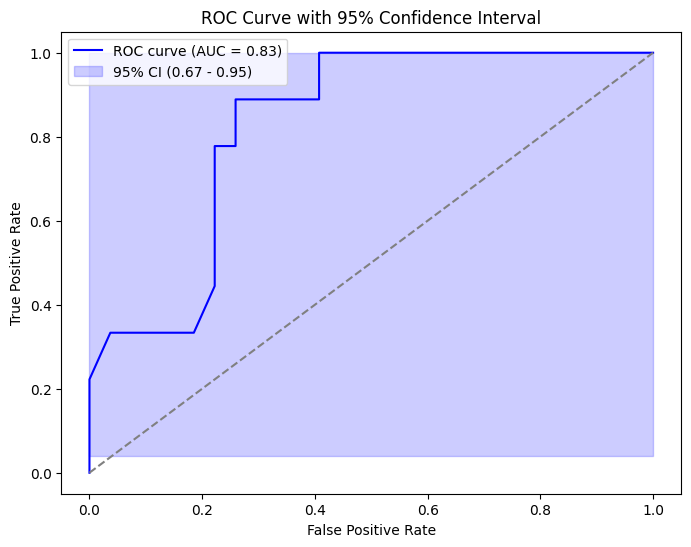

F1 Score: 0.375
AUC-ROC Score: 0.8271604938271605
95% AUC Confidence Interval: (0.6650, 0.9481)


In [22]:

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=4211)
import numpy as np

# Train Random Forest on selected features with 10-fold CV
auc_scores = []
for train_index, test_index in kf.split(X_selected,y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(n_estimators=100, random_state=41211)
    rf.fit(X_train, y_train)
    
    # Evaluate AUC-ROC
    y_pred_proba = rf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)

from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score

from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Print feature selection results
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# Print mean AUC-ROC
print(f'Mean AUC-ROC: {np.mean(auc_scores):.4f}')
s=[]
s1=[]
model2 = RandomForestClassifier(n_estimators=200,random_state=41211)

model2.fit(X_train, y_train)
pred = model2.predict(X_test)
prob = model2.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate base ROC curve
fpr, tpr, _ = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)

# Bootstrapping for confidence intervals
n_bootstraps = 1000
auc_scores = []

for _ in range(n_bootstraps):
    indices = resample(range(len(y_test)), replace=True)  # Sample with replacement
    if len(set(y_test.iloc[indices])) < 2:  # Ensure both classes are present
        continue
    fpr_i, tpr_i, _ = roc_curve(y_test.iloc[indices], prob[indices])
    auc_scores.append(auc(fpr_i, tpr_i))

# Compute 95% confidence interval
lower_bound = np.percentile(auc_scores, 2.5)
upper_bound = np.percentile(auc_scores, 97.5)

# Plot ROC curve with 95% CI
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.fill_between(fpr, np.percentile(tpr, 2.5, axis=0), np.percentile(tpr, 97.5, axis=0),
                 color="blue", alpha=0.2, label=f"95% CI ({lower_bound:.2f} - {upper_bound:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with 95% Confidence Interval")
plt.legend()
plt.show()

# Print scores
print("F1 Score:", f1_score(y_test, pred))
print("AUC-ROC Score:", roc_auc_score(y_test, prob))
print(f"95% AUC Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


In [ ]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

X=df.drop(columns=['MCI'])
y=df['MCI']
# Assuming X_selected and y are already defined
s = []
s1 = []
n_bootstraps = 1000  # Bootstrapping for confidence intervals

# Initialize model
model2 = CatBoostClassifier(
        iterations=200,
    
        eval_metric='AUC',
        verbose=0
    )

# 10-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold = 1

# Loop through each fold
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    model2.fit(X_train, y_train)

    # Predictions and probabilities
    pred = model2.predict(X_test)
    prob = model2.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)

    # Bootstrapping for AUC confidence intervals
    auc_scores = []
    for _ in range(n_bootstraps):
        indices = resample(range(len(y_test)), replace=True)  # Sample with replacement
        if len(set(y_test.iloc[indices])) < 2:  # Ensure both classes are present
            continue
        fpr_i, tpr_i, _ = roc_curve(y_test.iloc[indices], prob[indices])
        auc_scores.append(auc(fpr_i, tpr_i))

    # Compute 95% confidence interval
    lower_bound = np.percentile(auc_scores, 2.5)
    upper_bound = np.percentile(auc_scores, 97.5)

    # Plot ROC curve for each fold
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"Fold {fold} ROC curve (AUC = {roc_auc:.2f})")
    plt.fill_between(fpr, np.percentile(tpr, 2.5, axis=0), np.percentile(tpr, 97.5, axis=0),
                     color="blue", alpha=0.2, label=f"95% CI ({lower_bound:.2f} - {upper_bound:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Fold {fold} with 95% CI")
    plt.legend()
    plt.show()

    # Append F1 score and AUC to lists
    s.append(f1_score(y_test, pred))
    s1.append(roc_auc_score(y_test, prob))

    fold += 1

# Print overall performance
print("F1 Scores across all folds:", s)
print("AUC-ROC Scores across all folds:", s1)
print(f'Mean AUC-ROC: {np.mean(s1):.4f}')
print(f'Mean F1 Score: {np.mean(s):.4f}')

TypeError: 'numpy.float64' object is not callable

In [ ]:
import matplotlib.pyplot as plt

In [24]:
########HELIAD WITH SAME COLUMNS############################


df=pd.read_csv('heliad_31-3.csv')
df.shape

(399, 623)

In [15]:
#metabolites SM(41:1) AND PG(36:2) NOT IN HELIAD
columns_to_keep =['LPC(P-18:0)', 'd-Xylitol', 'SM(d18:2/20:0)', 'CE(16:2)', 'C5-M-DC', 'dhCer(d18:0/22:0)', 'L-Phenylalanine', 'd-Arabitol', 'TG(53:2) [NL-17:1]', 'Oxy 13-oxoODE', 'Methyl linolenate (C18:3n3 [cis-9,12,15])', 'Threonic acid', 'Glutamic acid', 'LPE(P-18:1)', 'BA CA', 'PC(33:0) (a\x08)', 'BA GCA', 'Oxy 9-oxoODE', 'FA 20:1', 'FA 20:3-iso2', 'Oxy 12(13)-DiHOME', 'Oxy 15(16)-EpODE', 'PC(40:5) (a\x08)', 'PE(P-20:0/18:2)', 'L-Threonine', 'BA CDCA', 'FA(12:2)-3OH', 'LPE(P-18:0)', 'SM(40:3) (a\x08)', 'Xylonic acid', 'FA(10:1)-3OH', 'Myo-Inositol', 'LPC(22:0) (a\x08)', 'SM(43:1)', 'PE(P-18:1/18:1) (a\x08)', 'Hex2Cer(d18:1/16:0)', 'LPE 18:1 sn1', 'FA(6:0)-3OH', 'PE(P-16:0/22:4)', 'LPC 20:1 sn1', 'TG(54:3) [NL-18:1]', 'PE(P-20:0/20:4)', 'PC(18:0_22:6)'
,'Amyloid']



# Keep only the specified columns
df = df[columns_to_keep]

print(df.head())  # Display first few rows

   LPC(P-18:0)  d-Xylitol  SM(d18:2/20:0)  CE(16:2)   C5-M-DC  \
0    -0.547159   0.263539       -0.596918  0.622356  0.522785   
1     0.270836   0.948851        1.103839 -0.007041 -0.435883   
2    -1.667044   0.169799       -1.726432 -1.726432  1.341447   
3     0.443639   0.728525       -0.428154 -1.517211 -0.522785   
4    -1.667044   1.053450       -0.498719 -0.605354 -0.205632   

   dhCer(d18:0/22:0)  L-Phenylalanine  d-Arabitol  TG(53:2) [NL-17:1]  \
0          -0.176946         1.143553    0.162660           -0.692276   
1          -0.514730         0.863904   -1.613014           -0.241731   
2          -0.728525         2.389879    1.324331            1.867744   
3          -0.176946         0.263539   -0.728525           -1.259457   
4           0.063412         0.506708    0.622356           -0.580173   

   Oxy 13-oxoODE  ...  PE(P-18:1/18:1) ()  Hex2Cer(d18:1/16:0)  \
0      -0.863904  ...             -1.157199            -2.060761   
1      -2.389879  ...              0

In [16]:
df.to_csv('amyloid_selected_feats_OVER50_ONLY_METABS.csv',index=False)

In [94]:
df = df.replace({',': '.'}, regex=True)

def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return val  # Return the value as-is if it can't be converted to float

# Apply the function element-wise to the DataFrame
df = df.applymap(convert_to_float)


C:\Users\iituser\AppData\Local\Temp\ipykernel_13924\423444228.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_to_float)


In [ ]:
df.shape

In [ ]:
df.to_csv('heliadAPRIL_ONLY_METABS.csv',index=False)

In [ ]:
import matplotlib.pyplot as plt
import shap
shap.initjs()

In [27]:

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=421151)
import numpy as np

# Train Random Forest on selected features with 10-fold CV
auc_scores = []
fold_number = 1
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(n_estimators=200)
    rf.fit(X_train, y_train)
    
    # Evaluate AUC-ROC
    y_pred_proba = rf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    


# Print feature selection results

# Print mean AUC-ROC
print(f'Mean AUC-ROC: {np.mean(auc_scores):.4f}')

Mean AUC-ROC: 0.9224


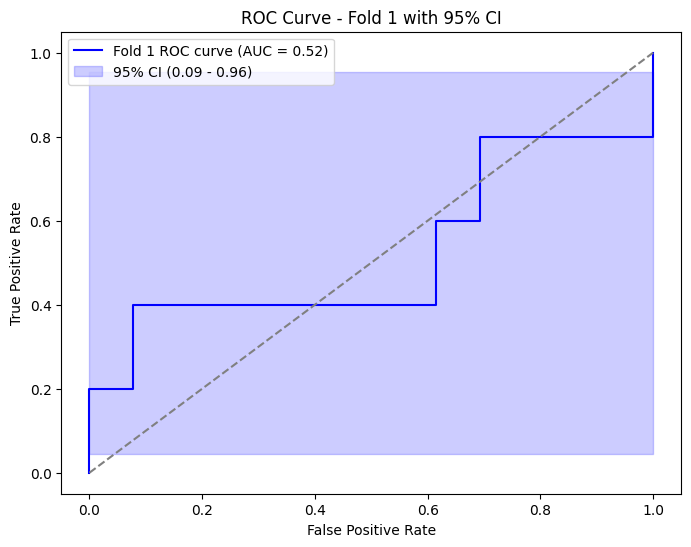

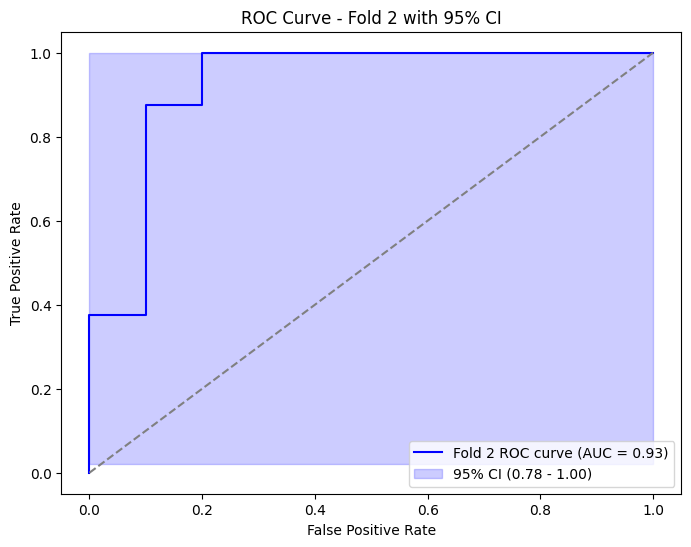

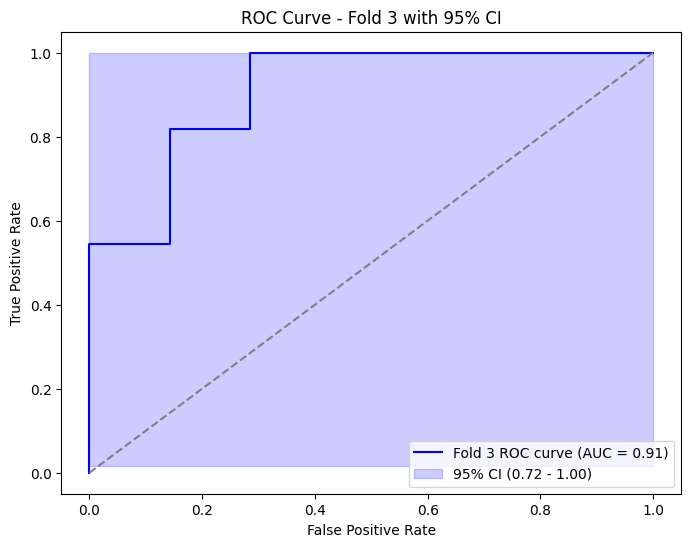

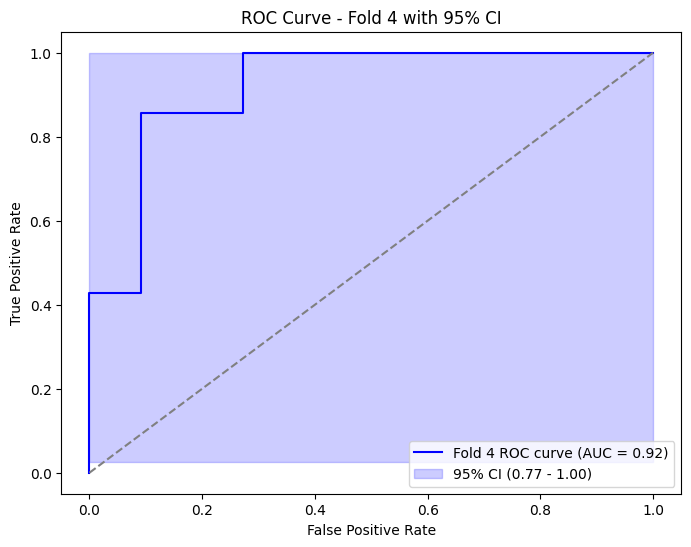

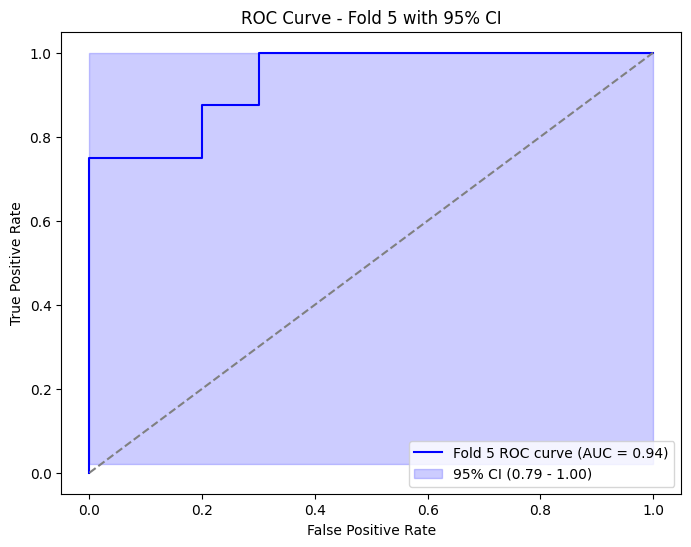

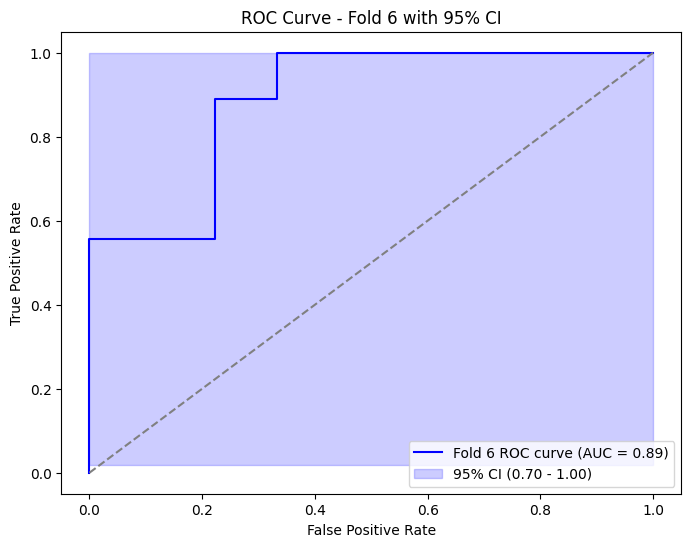

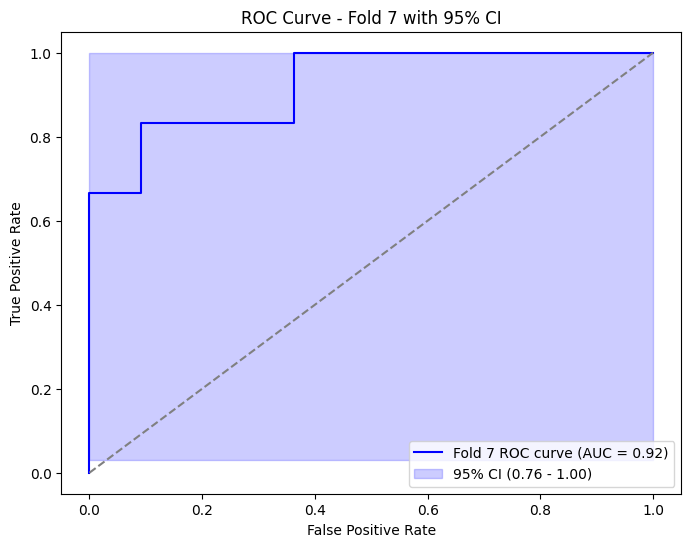

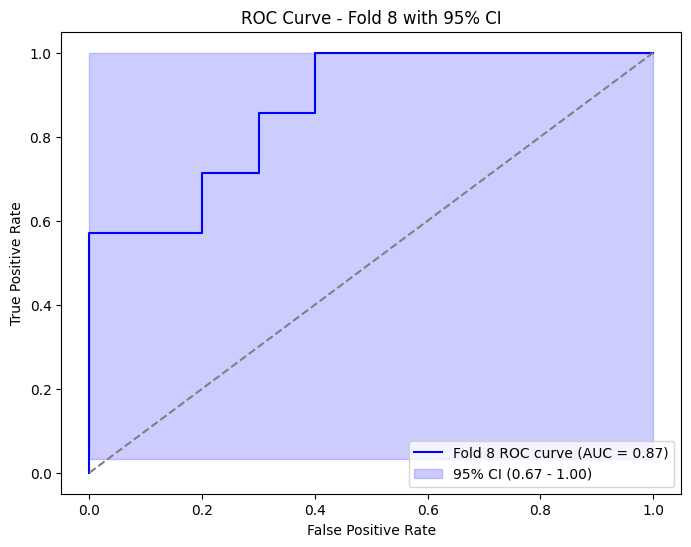

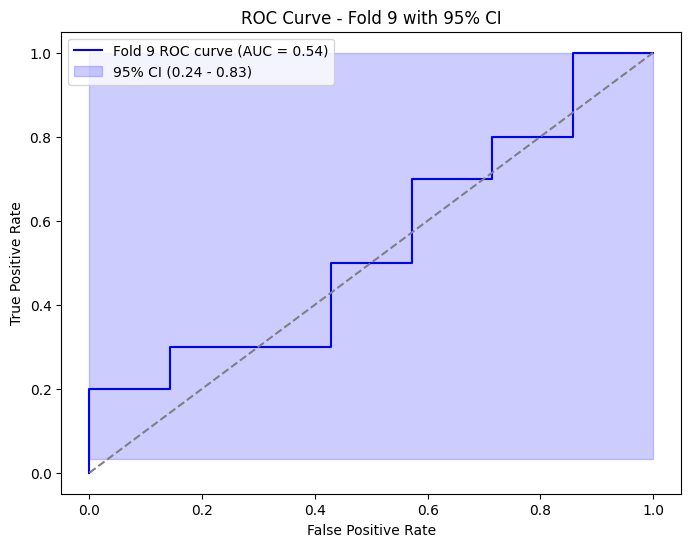

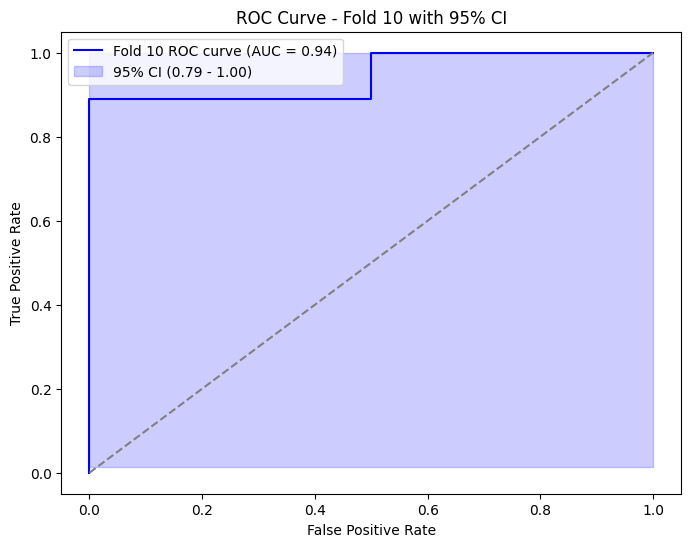

F1 Scores across all folds: [0.4, 0.875, 0.8571428571428571, 0.8571428571428571, 0.75, 0.6153846153846154, 0.7692307692307693, 0.7142857142857143, 0.5263157894736842, 0.9411764705882353]
AUC-ROC Scores across all folds: [0.5230769230769231, 0.925, 0.9090909090909091, 0.922077922077922, 0.9375, 0.888888888888889, 0.9242424242424242, 0.8714285714285714, 0.5428571428571429, 0.9444444444444444]
Mean AUC-ROC: 0.8389
Mean F1 Score: 0.7306


In [90]:
from sklearn.model_selection import KFold
from sklearn.utils import resample
import matplotlib.pyplot as plt
# Assuming X_selected and y are already defined
s = []
s1 = []
n_bootstraps = 1000  # Bootstrapping for confidence intervals

# Initialize model
model2 = CatBoostClassifier(
        iterations=200,depth=4,learning_rate=0.03,
    
        eval_metric='AUC',
        verbose=0
    )

# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold = 1
from sklearn.metrics import auc

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit model
    model2.fit(X_train, y_train)

    # Predictions and probabilities
    pred = model2.predict(X_test)
    prob = model2.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)

    # Bootstrapping for AUC confidence intervals
    auc_scores = []
    for _ in range(n_bootstraps):
        indices = resample(range(len(y_test)), replace=True)  # Sample with replacement
        if len(set(y_test.iloc[indices])) < 2:  # Ensure both classes are present
            continue
        fpr_i, tpr_i, _ = roc_curve(y_test.iloc[indices], prob[indices])
        auc_scores.append(auc(fpr_i, tpr_i))

    # Compute 95% confidence interval
    lower_bound = np.percentile(auc_scores, 2.5)
    upper_bound = np.percentile(auc_scores, 97.5)

    # Plot ROC curve for each fold
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"Fold {fold} ROC curve (AUC = {roc_auc:.2f})")
    plt.fill_between(fpr, np.percentile(tpr, 2.5, axis=0), np.percentile(tpr, 97.5, axis=0),
                     color="blue", alpha=0.2, label=f"95% CI ({lower_bound:.2f} - {upper_bound:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Fold {fold} with 95% CI")
    plt.legend()
    plt.show()

    # Append F1 score and AUC to lists
    s.append(f1_score(y_test, pred))
    s1.append(roc_auc_score(y_test, prob))

    fold += 1

# Print overall performance
print("F1 Scores across all folds:", s)
print("AUC-ROC Scores across all folds:", s1)
print(f'Mean AUC-ROC: {np.mean(s1):.4f}')
print(f'Mean F1 Score: {np.mean(s):.4f}')

In [ ]:
model2

In [ ]:
rf.fit(X_selected)

In [1]:
import pandas as pd

# Load the CSV files
df1 = pd.read_csv('amyloid_selected_feats.csv')  # Your main dataset
df2 = pd.read_csv('amyloid_selected_feats_OVER50_ONLY_METABS.csv')  # Dataset with updated values

# Find shared column names
shared_columns = df1.columns.intersection(df2.columns)

# Replace only the shared columns in df1 with values from df2
df1[shared_columns] = df2[shared_columns]

# Save or use the updated dataframe


In [3]:
df1

Age_auto  E4a  LPE(P-18:0)  TG(54:3) [NL-18:1]  LANGUAGE  MED6  \
0        69.0  1.0     2.769283           -1.613014       0.0   0.0   
1        71.0  1.0     1.017346            0.538999       0.0   0.0   
2        64.0  1.0    -0.656914            0.588525       0.0   0.0   
3        72.0  3.0    -0.227256           -0.747012       0.0   0.0   
4        53.0  0.0     0.270836           -0.091662       0.0   0.0   
..        ...  ...          ...                 ...       ...   ...   
171      54.0  2.0     1.453563           -0.459232       0.0   0.0   
172      56.0  1.0     1.199491           -0.234487       0.0   0.0   
173      49.0  2.0     1.726432           -0.710284       0.0   0.0   
174      69.0  4.0     0.756352           -0.307547       0.0   0.0   
175      57.0  2.0    -0.042259           -0.191269       0.0   0.0   

     FA(12:2)-3OH  LPC(P-18:0)  d-Xylitol  FA 20:3-iso2  ...  MH8  \
0       -1.395313    -0.547159   0.263539      0.248987  ...  1.0   
1       -1.867744     0.270836   0.948851     -0.823696  ...  1.0   
2       -1.563319    -1.667044   0.169799     -0.148406  ...  1.0   
3       -1.324331     0.443639   0.728525     -1.474119  ...  1.0   
4       -0.352159    -1.667044   1.053450      0.710284  ...  1.0   
..            ...          ...        ...           ...  ...  ...   
171      0.337215     1.792620  -1.695991      2.060761  ...  0.0   
172     -0.021125     1.185158  -0.813851      0.352159  ...  0.0   
173      0.823696     1.090982  -0.405115     -0.971176  ...  0.0   
174     -0.443639     0.035213  -0.119986      0.588525  ...  0.0   
175      0.863904    -0.874176  -0.205632      0.622356  ...  0.0   

     Cer(m18:0/24:1)  BA UDCA/HDCA  PG(36:2)  PE(P-20:0/18:2)  \
0              0.019     3571.0497     1.109         0.884541   
1              0.013    27500.3478     0.902        -0.077530   
2              0.045    25756.7316     1.413        -0.959953   
3              0.010      992.5417     0.434         0.322345   
4              0.037     7722.2541     0.981        -2.123549   
..               ...           ...       ...              ...   
171            0.010     7283.6494     0.663        -0.506708   
172            0.011     3057.5914     0.844         2.196029   
173            0.018     1687.2300     0.892         1.539856   
174            0.016     2303.6881     0.553         1.090982   
175            0.019     2078.2981     1.158        -2.389879   

     Horm androsterone sulfate    C5:0  HexCer(d18:2/24:0)  \
0                     166.2879  0.2232               0.029   
1                     140.6148  0.0826               0.057   
2                     411.8529  0.1780               0.020   
3                     649.7267  0.0861               0.046   
4                    1465.2077  0.1785               0.029   
..                         ...     ...                 ...   
171                   482.7451  0.1137               0.097   
172                   912.1896  0.1394               0.046   
173                   562.7238  0.1822               0.032   
174                   194.5905  0.1446               0.044   
175                   362.9048  0.1002               0.096   

     LPC(19:1) (a  b  c)  Amyloid  
0                  0.029      1.0  
1                  0.033      0.0  
2                  0.018      0.0  
3                  0.034      1.0  
4                  0.015      0.0  
..                   ...      ...  
171                0.035      1.0  
172                0.022      1.0  
173                0.029      1.0  
174                0.029      1.0  
175                0.043      1.0  

[176 rows x 44 columns]

In [91]:
df=pd.read_csv('new_albion_columnsJUNE2025_2.csv')


In [40]:
mci_values = [
    0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,
    0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,
    1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,
    0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,
    1.0, 1.0, 0.0, 1.0, 0.0, 0.0
]

In [41]:
df['MCI2']=mci_values

In [92]:
df

TG(49:1) [NL-16:1] EXECUTIVE PC(35:2) (a)  MH8  LANGUAGE MMSE HADS_A1  \
0                1,263         0         7,757    1         0   30       0   
1                1,715         0         8,134    1         0   29       0   
2                1,698         1         4,249    1         0   30       0   
3                1,534         0         7,961    1         0   27       0   
4                1,153         0          3,87    1         0   29       3   
..                 ...       ...           ...  ...       ...  ...     ...   
171              2,321         0        10,043    0         0   30       0   
172              2,921         0         6,461    0         0   30       1   
173              2,098         0         5,155    0         0   30       3   
174              2,052         0         7,251    0         0   22       2   
175              1,698         0         6,999    0         0   30       0   

    E4a      FA 18:1 d-Xylitol  ... FamilyHistory FA(8:0)-2OH PC(28:0)  \
0     1   84372,3444    0,5003  ...             0     24,8183    0,186   
1     1  142992,3427    0,5175  ...             1     35,5404    0,096   
2     1  164565,5792    0,4996  ...             1     27,0485    0,074   
3     3  178335,8838     0,512  ...             0     21,0972    0,068   
4     0  170509,3917    0,5186  ...             0     12,6337    0,089   
..   ..          ...       ...  ...           ...         ...      ...   
171   2  136305,3085    0,4874  ...             1     86,1259    0,159   
172   1    195648,71    0,4914  ...             0     17,8945    0,231   
173   2  171486,1165    0,4909  ...             1      3,0832    0,295   
174   4  122600,7759    0,4705  ...             0     44,4152    0,186   
175   2  261374,5747    0,4991  ...             1     61,8688    0,208   

    Cer(m18:0/24:0)  LPC 20:1 sn1   C18:2 LPE 20:4 sn1 PC(P-15:0/20:4) (a)  \
0             0,025      149,6329  0,0524    1662,6043                 1,83   
1             0,025      184,3901  0,0237     937,5339                1,682   
2             0,032       73,4025  0,0321     826,3804                1,778   
3             0,022      156,9597  0,0146    1026,5167                1,695   
4             0,019      119,3308  0,0267    1204,3636                1,634   
..              ...           ...     ...          ...                  ...   
171           0,028      182,5401  0,0397    1264,6145                 1,78   
172           0,013       94,9131  0,0432    1634,3257                1,736   
173            0,01      145,5536  0,0228    1142,7859                1,747   
174           0,022      142,2348  0,0167    1723,8471                1,841   
175           0,028       264,667   0,029     1691,892                1,736   

     SEX  MCI  
0      2  0.0  
1      2  1.0  
2      1  1.0  
3      1  1.0  
4      2  1.0  
..   ...  ...  
171    2  1.0  
172    2  0.0  
173    1  1.0  
174    2  0.0  
175    2  0.0  

[176 rows x 42 columns]

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedGroupKFold,StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score, recall_score, roc_auc_score,confusion_matrix,accuracy_score,precision_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import LeaveOneOut
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('new_heliad_columnsJUNE2025.csv')
#df=df.drop(columns=['PG(36:2)'])
df = df.replace({',': '.'}, regex=True)

def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return val  # Return the value as-is if it can't be converted to float

# Apply the function element-wise to the DataFrame
df = df.applymap(convert_to_float)
#df=pd.read_csv('albionAPRIL.csv')
#df.rename(columns={'C1': 'Hypertension History', 'E4a': 'Going out to see friends','C12': 'Cancer History', 'H3': 'Sleep problems','C55': 'Antiepileptic drug medication', 'F2': 'Manages finances','C27':'SMOKING' }, inplace=True)
#df=df.drop(columns=['DIAGNOSIS','MCI'])
X=df.drop(columns=['G21'])
y=df['G21']

# Initialize cross-validation
scaler=StandardScaler()
from sklearn.linear_model import LogisticRegression


rf=CatBoostClassifier(iterations=300)# 10-fold stratified cross-validation
#cv = RepeatedStratifiedKFold(n_repeats=10,n_splits=10,random_state=2)
import random
# Store scores
f1_scores = []
recall_scores = []
roc_auc_scores = []
acc_scores=[]# Manual CV loop
prec_scores=[]
# 10 x 10-fold stratified CV with different random states
n_repeats = 10
n_splits = 10


cv = RepeatedStratifiedKFold(n_repeats=10,n_splits=10)

for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train_scaled = scaler.fit_transform(X_train)  # Fit only on train
        X_test_scaled = scaler.transform(X_test)        # Transform test

    # Fit the model
        rf.fit(X_train_scaled, y_train)

        # Predict
        y_pred = rf.predict(X_test_scaled)
        y_proba = rf.predict_proba(X_test_scaled)[:, 1]

    # Scores
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_proba))
        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, zero_division=0))

prec_scores.append(precision_score(y_test,y_pred,zero_division=0))
# Print average scores
print("Average F1 Score   :", np.mean(f1_scores))
print("Average Recall     :", np.mean(recall_scores))
print("Average ROC AUC    :", np.mean(roc_auc_scores))
print("Average Accuracy   :", np.mean(acc_scores))
print("Average Precision   :", np.mean(prec_scores))


C:\Users\sothr\AppData\Local\Temp\ipykernel_6984\3190138685.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_to_float)


Learning rate set to 0.020065
0:	learn: 0.6863175	total: 4.79ms	remaining: 1.43s
1:	learn: 0.6805705	total: 8.77ms	remaining: 1.31s
2:	learn: 0.6740494	total: 12.5ms	remaining: 1.23s
3:	learn: 0.6692032	total: 16.3ms	remaining: 1.21s
4:	learn: 0.6637105	total: 19.8ms	remaining: 1.17s
5:	learn: 0.6588702	total: 23.2ms	remaining: 1.13s
6:	learn: 0.6537124	total: 26.6ms	remaining: 1.11s
7:	learn: 0.6483976	total: 31.6ms	remaining: 1.15s
8:	learn: 0.6440686	total: 36.7ms	remaining: 1.19s
9:	learn: 0.6382705	total: 42.2ms	remaining: 1.22s
10:	learn: 0.6333732	total: 47.2ms	remaining: 1.24s
11:	learn: 0.6275167	total: 52.4ms	remaining: 1.26s
12:	learn: 0.6217766	total: 56.5ms	remaining: 1.25s
13:	learn: 0.6170020	total: 60.5ms	remaining: 1.24s
14:	learn: 0.6124962	total: 64.8ms	remaining: 1.23s
15:	learn: 0.6080859	total: 68.9ms	remaining: 1.22s
16:	learn: 0.6036319	total: 72.1ms	remaining: 1.2s
17:	learn: 0.5976074	total: 75.2ms	remaining: 1.18s
18:	learn: 0.5935426	total: 78.3ms	remaining:

In [22]:
df.columns

Index(['TG(49:1) [NL-16:1]', 'EXECUTIVE', 'PC(35:2) (a)', 'MH8', 'LANGUAGE',
       'MMSE', 'HADS_A1', 'E4a', 'FA 18:1', 'd-Xylitol', 'C5:0',
       'Cer(d18:1/20:0)', 'PG(36:2)', 'Horm pregnenolone sulfate', 'MH7',
       'PC(40:8)', 'SM(43:2) (a  b c)', 'C5:1', 'SMOKING', 'Cer(d19:1/24:0)',
       'CE(20:1)', 'FA(12:2)-3OH', 'Oxy 15(s)-HETE', 'C5-M-DC',
       'Cer(d19:1/24:1)', 'SM(d18:1/18:0)/SM(d16:1/20:0)', 'BA LCA',
       'Cer(d18:1/21:0)', 'FA 18:2', 'SM(43:1)', 'L-Alanine', 'LPC 20:4 sn1',
       'FamilyHistory', 'FA(8:0)-2OH', 'PC(28:0)', 'Cer(m18:0/24:0)',
       'LPC 20:1 sn1', 'C18:2', 'LPE 20:4 sn1', 'PC(P-15:0/20:4) (a)', 'SEX',
       'MCI'],
      dtype='object')

In [23]:
df_heliad=pd.read_csv('heliad_31-3.csv')
df_heliad.shape

(399, 623)

In [24]:
# pg36:2 not found
columns_to_keep = [
    'TG(49:1) [NL-16:1]', 'G3','G17psy','PC(35:2) (a)' , 'C1','MMSE','J16','E4a','FA 18:1','d-Xylitol','C5:0','Cer(d18:1/20:0)','Horm pregnenolone sulfate','C2','PC(40:8)','SM(43:2) (a b c)',
    'C5:1','C27','Cer(d19:1/24:0)','CE(20:1)','FA(12:2)-3OH','Oxy 15(s)-HETE','C5-M-DC','Cer(d19:1/24:1)','SM(d18:1/18:0)/SM(d16:1/20:0)',
    'BA LCA','Cer(d18:1/21:0)','FA 18:2','SM(43:1)','L-Alanine','LPC 20:4 sn1','FHdementia','FA(8:0)-2OH','PC(28:0)','Cer(m18:0/24:0)','LPC 20:1 sn1','C18:2','LPE 20:4 sn1','PC(P-15:0/20:4) (a)',
    'G21','A11'
]

# Filter the DataFrame
df_filtered = df_heliad[columns_to_keep]

In [26]:
df_filtered.to_csv('new_heliad_columnsJUNE2025.csv',index=False)

In [14]:
import matplotlib.pyplot as plt

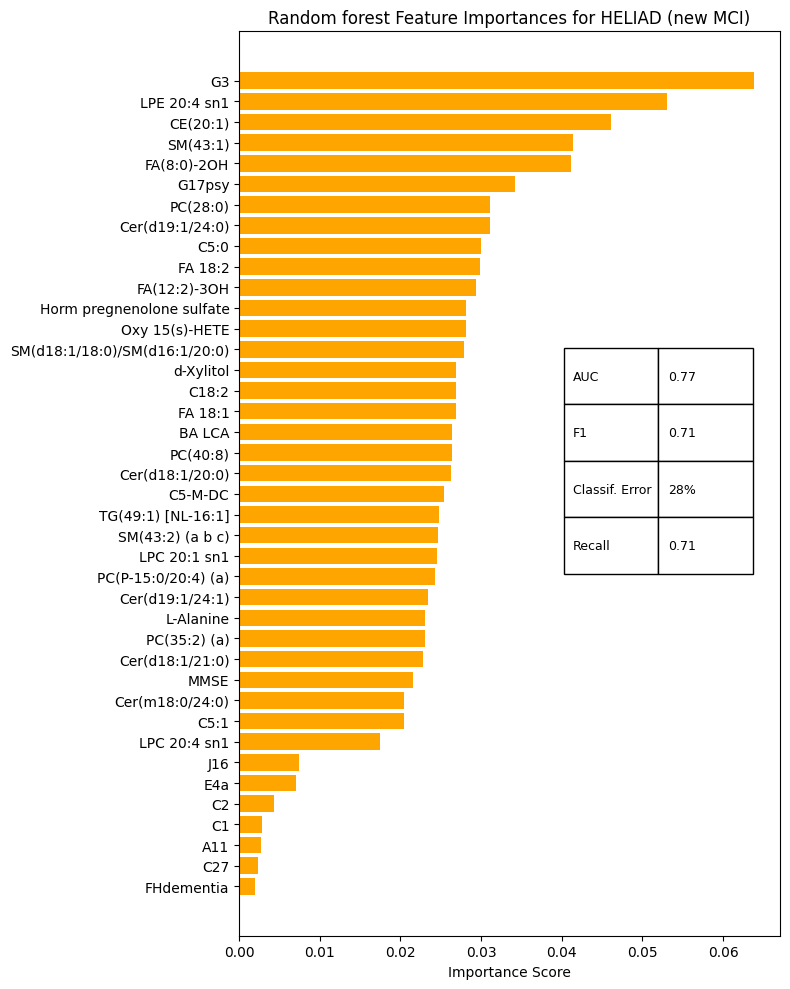

In [31]:
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='orange')
plt.xlabel('Importance Score')
plt.title('Random forest Feature Importances for HELIAD (new MCI)')
plt.tight_layout()
#plt.show()
cell_text = [
    ["AUC", "0.77"],
    ["F1", "0.71"],
    ["Classif. Error", "28%"],
    ['Recall','0.71']
]

# Add the table to the plot (positioned in the upper right corner)
plt.table(cellText=cell_text,
          colWidths=[0.25]*2,
          cellLoc='left',
          colLabels=None,
          loc='upper right',
          bbox=[0.6, 0.4, 0.35, 0.25])  # [x, y, width, height]

plt.tight_layout()
plt.show()

In [8]:
feature_importance_df.sort_values(by='Importance',ascending=False)

Feature  Importance
1                                                 G3    9.866548
25                                       LPC(O-16:0)    9.085856
9                                           PI(36:2)    7.992099
3                                             G17psy    7.632530
6                                       Oxy 9-oxoODE    5.753337
16                                      LPC 20:2 sn2    5.662529
14                                          C14:0-OH    5.167935
19                         Horm pregnenolone sulfate    4.083132
11                                         d-Xylitol    4.026592
7                             Arachidic acid (C20:0)    3.907376
17                                      FA 18:3-iso1    3.694205
22  Horm 5alpha-androstan-3,17-diol monosulfate-iso1    3.666944
12                   Horm 16a-hydroxy DHEA 3-sulfate    3.570122
24                                              C5:1    3.517050
15                                           BA CDCA    3.135175
0                                                 C1    3.081551
18                                   Cer(d16:1/24:1)    2.938140
8                                                 H3    2.827357
4                                               MMSE    2.715093
20                                           APOEgen    2.157799
2                                                E4a    1.917366
5                                                C12    1.036544
10                                               C55    0.756388
21                                        FHdementia    0.695336
23                                               C27    0.607076
13                                                F2    0.505921

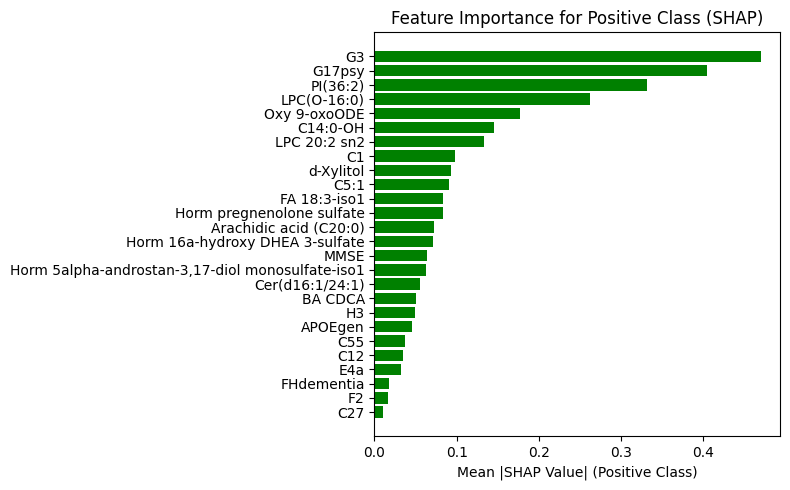

In [4]:
import numpy as np
shap_values = rf.get_feature_importance(Pool(X, label=y), type='ShapValues')

# For binary classification, shap_values has shape (n_samples, n_features + 1)
# The last column is the expected value (base value)

# Get mean absolute SHAP values for the positive class
mean_abs_shap = np.abs(shap_values[:, :-1]).mean(axis=0)

# Put into DataFrame for plotting
shap_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': mean_abs_shap
}).sort_values(by='SHAP Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(shap_df['Feature'], shap_df['SHAP Importance'], color='green')
plt.xlabel('Mean |SHAP Value| (Positive Class)')
plt.title('Feature Importance for Positive Class (SHAP)')
plt.tight_layout()
plt.show()

In [7]:
importances = rf.feature_importances_
feature_names = X_train.columns  # if X_train is a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and display
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                             Feature  Importance
4                                               MMSE    0.177204
1                                          EXECUTIVE    0.105345
6                                       Oxy 9-oxoODE    0.064222
3                                           LANGUAGE    0.063596
7                          Methyl arachidate (C20:0)    0.048432
14                                          C14:0-OH    0.045741
12                   Horm 16a-hydroxy DHEA 3-sulfate    0.043413
15                                           BA CDCA    0.043385
9                                           PI(36:2)    0.042183
11                                         d-Xylitol    0.041271
22  Horm 5alpha-androstan-3,17-diol monosulfate-iso1    0.039914
17                                      FA 18:3-iso1    0.033723
16                                      LPC 20:2 sn2    0.033513
2                                                E4a    0.030038
19                       

In [ ]:
source_df = pd.read_csv('helmet_MCI_Imp_INT.csv')
target_df = pd.read_csv('heliadAPRIL.csv')

# Select the column to copy (e.g., 'new_column')
column_to_add = source_df['MCI']

# Add the column to the target DataFrame
# Make sure they have the same number of rows or align as needed
target_df['DIAGNOSIS'] = column_to_add

In [ ]:
target_df['DIAGNOSIS'].value_counts()

In [ ]:
target_df=target_df.drop(columns=['G21'])
target_df.to_csv('heliadAPRIL2.csv',index=False)

In [2]:
import pandas as pd
df=pd.read_csv('albionAPRIL.csv')
df.columns

Index(['MH8', 'EXECUTIVE', 'E4a', 'LANGUAGE', 'MMSE', 'MH19', 'Oxy 9-oxoODE',
       'Methyl arachidate (C20:0)', 'H3', 'PI(36:2)', 'MED6', 'd-Xylitol',
       'Horm 16a-hydroxy DHEA 3-sulfate', 'IADL8', 'C14:0-OH', 'BA CDCA',
       'LPC 20:2 sn2', 'FA 18:3-iso1', 'Cer(d16:1/24:1)',
       'Horm pregnenolone sulfate', 'APOE', 'FamilyHistory',
       'Horm 5alpha-androstan-3,17-diol monosulfate-iso1', 'SMOKING', 'C5:1',
       'LPC(O-16:0)', 'DIAGNOSIS'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import random
df=pd.read_csv('albionAPRIL_AMYLOID.csv')
df.shape
df=df.drop(columns=['Amyloid'])
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df.shape
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [9]:
df.shape

(176, 27)

In [11]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Simulate dataset ---
X=df.drop(columns=['DIAGNOSIS'])
y=df['DIAGNOSIS']

# --- Randomly select 25 features ---
#selected_features = random.sample(list(X.columns), 25)
X_selected = X

# --- KFold cross-validation setup ---
kf = KFold(n_splits=10, shuffle=True, random_state=4132)

# --- Store metrics ---
accuracies = []
precisions = []
recalls = []
f1s = []

# --- Perform CV manually ---
for fold, (train_idx, test_idx) in enumerate(kf.split(X_selected)):
    X_train, X_test = X_selected.iloc[train_idx], X_selected.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model = RandomForestClassifier(n_estimators=300, random_state=421)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute metrics for this fold
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

# --- Print average metrics ---
print("Manual 10-Fold Cross-Validation Averages:")
print(f"Accuracy:  {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall:    {np.mean(recalls):.4f}")
print(f"F1 Score:  {np.mean(f1s):.4f}")


Manual 10-Fold Cross-Validation Averages:
Accuracy:  0.8418
Precision: 0.8240
Recall:    0.6643
F1 Score:  0.7245


C:\Users\iituser\AppData\Local\Temp\ipykernel_14000\99519998.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_to_float)
c:\Users\iituser\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.draw()
C:\Users\iituser\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


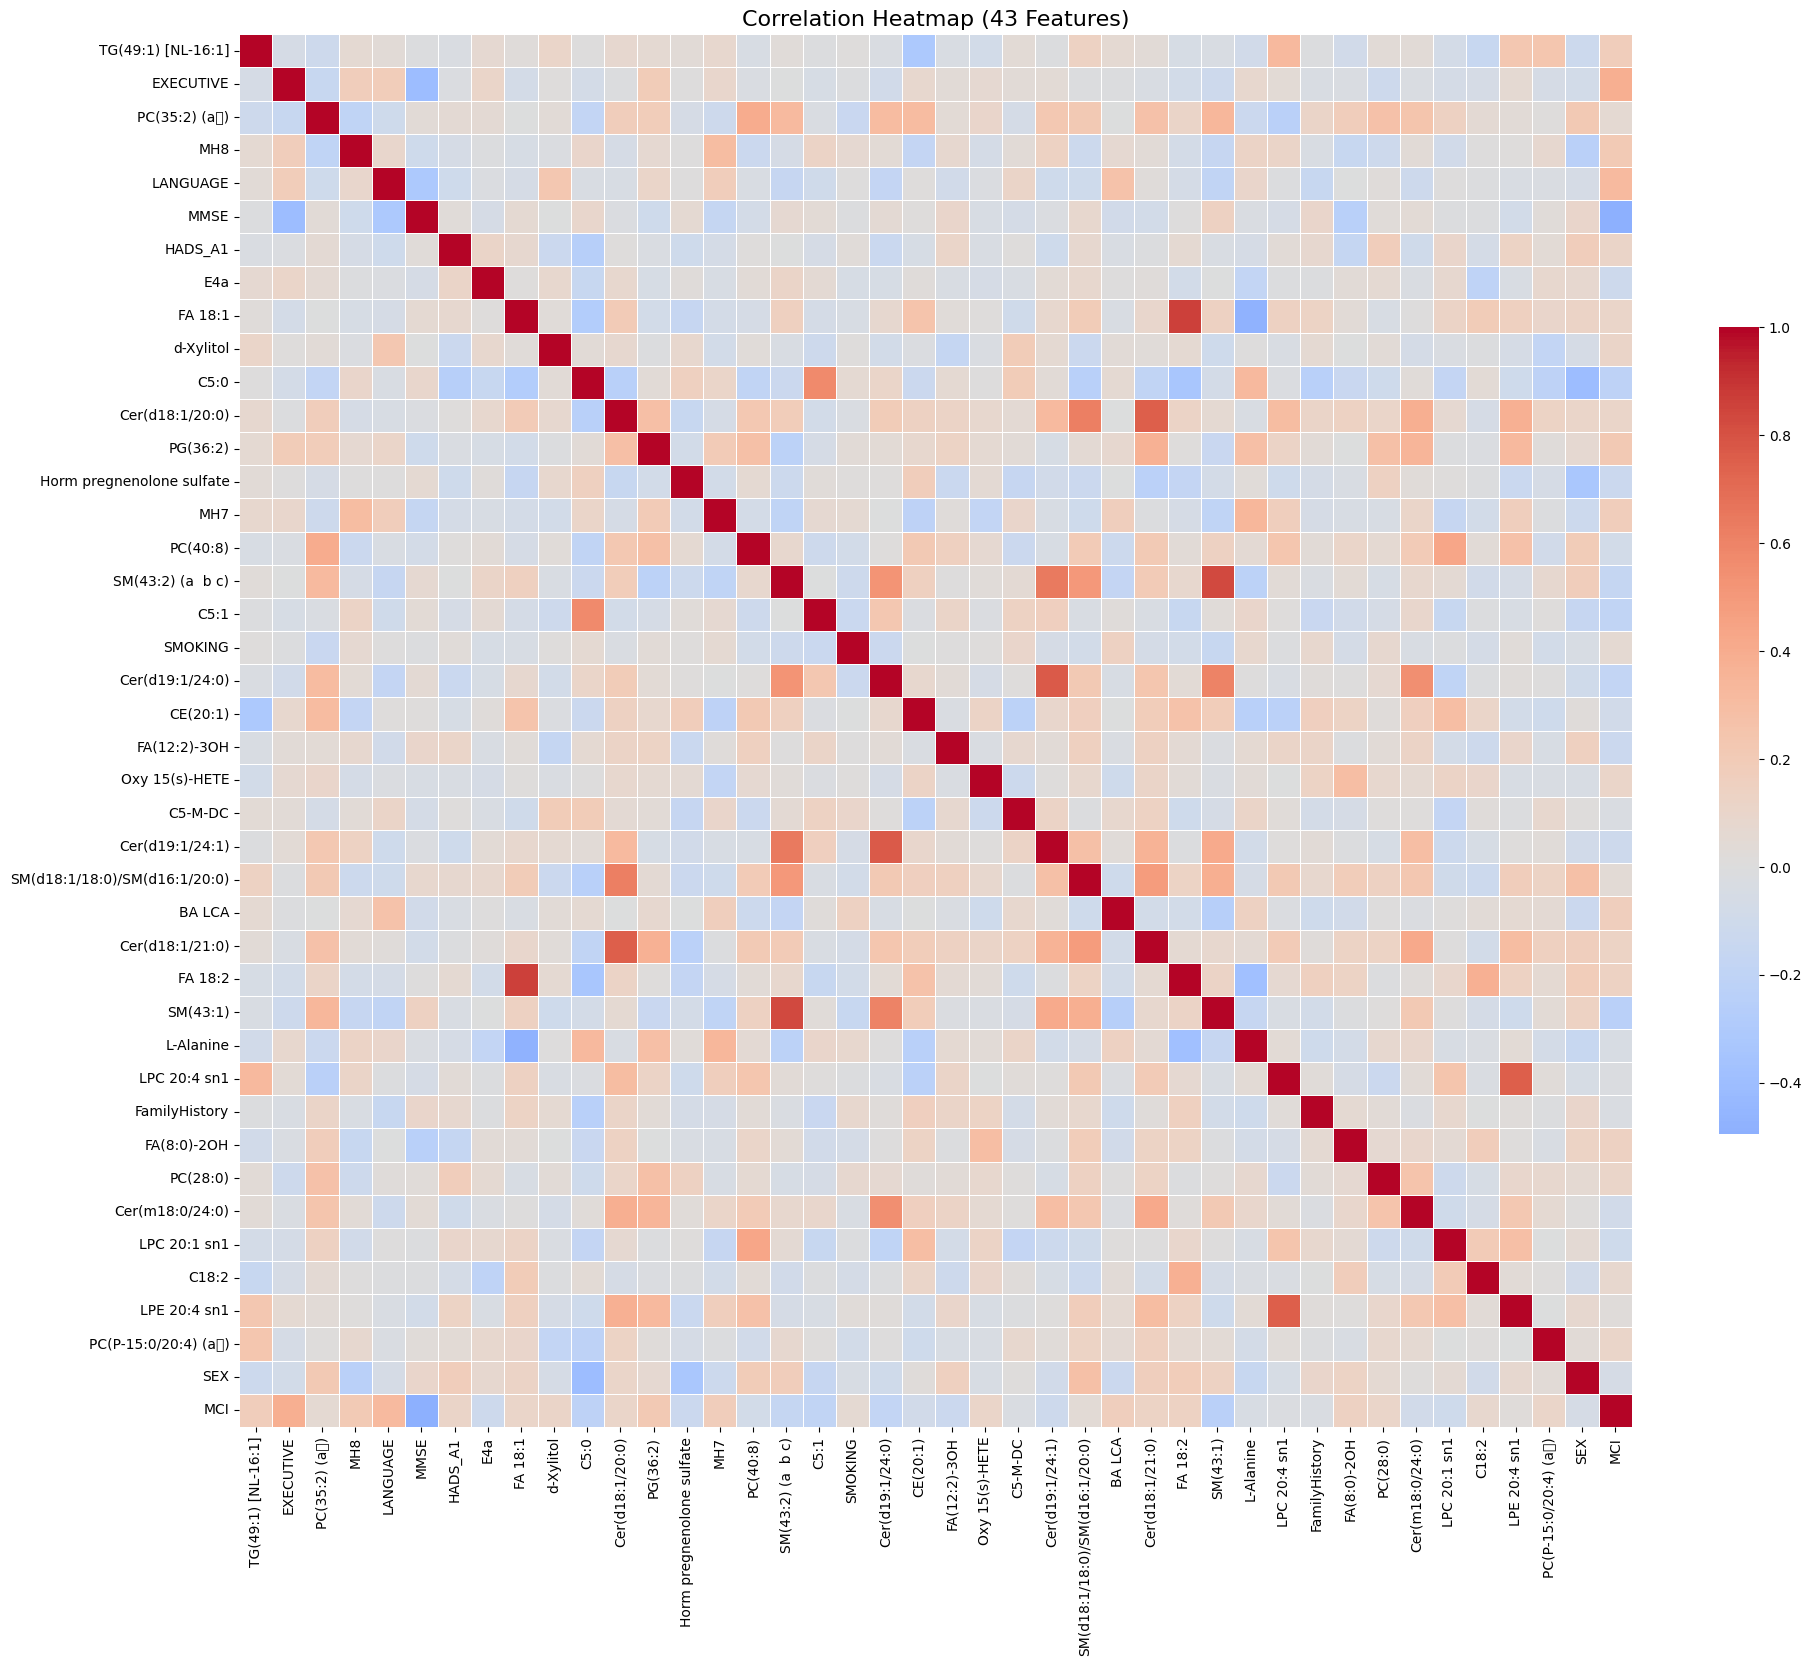

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("new_albion_columnsJUNE2025_2.csv")
df = df.replace({',': '.'}, regex=True)

def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return val  # Return the value as-is if it can't be converted to float

# Apply the function element-wise to the DataFrame
df = df.applymap(convert_to_float)
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))  # Adjust size for 43 features

# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (43 Features)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

c:\Users\sothr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.draw()
c:\Users\sothr\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


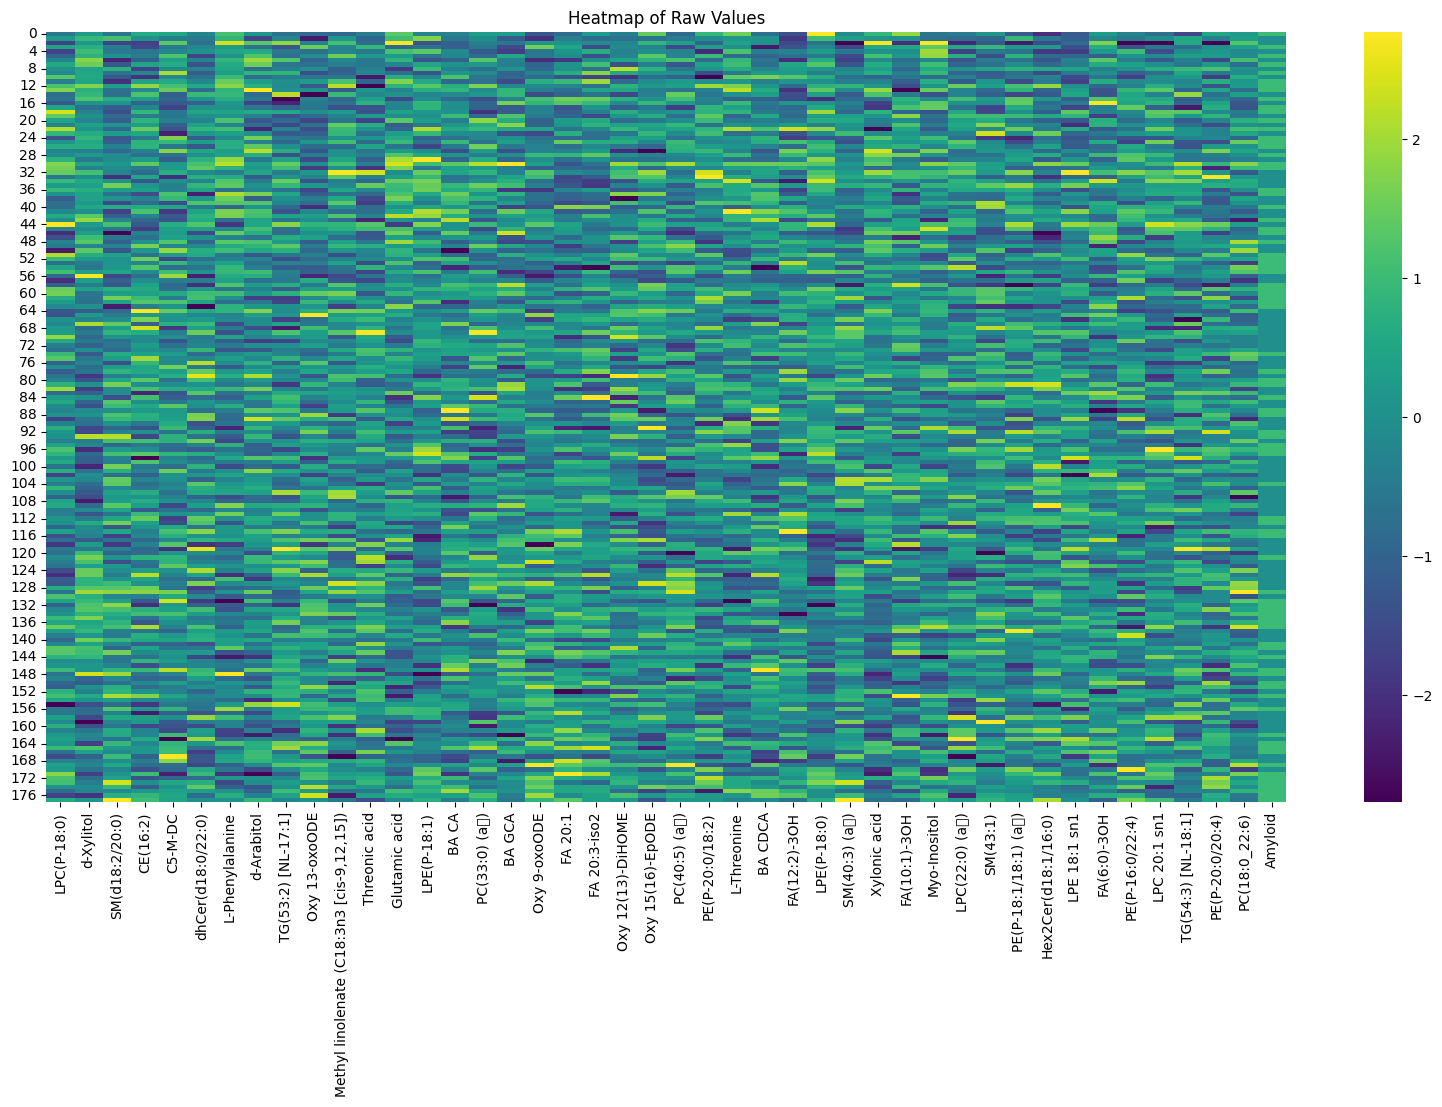

In [2]:
# If values vary too much, normalize (optional)
# df = (df - df.min()) / (df.max() - df.min())

# Plot heatmap of raw data
plt.figure(figsize=(20, 10))
sns.heatmap(df, cmap='viridis', cbar=True)
plt.title("Heatmap of Raw Values")
plt.show()

In [3]:
from scipy.stats import zscore
import numpy as np

z_scores = zscore(df)
outliers = (np.abs(z_scores) > 3)

# How many outliers per feature
outlier_counts = outliers.sum(axis=0)
print("Outliers per feature:")
print(outlier_counts)

Outliers per feature:
LPC(P-18:0)                                  0
d-Xylitol                                    0
SM(d18:2/20:0)                               0
CE(16:2)                                     0
C5-M-DC                                      0
dhCer(d18:0/22:0)                            0
L-Phenylalanine                              0
d-Arabitol                                   0
TG(53:2) [NL-17:1]                           0
Oxy 13-oxoODE                                0
Methyl linolenate (C18:3n3 [cis-9,12,15])    0
Threonic acid                                0
Glutamic acid                                0
LPE(P-18:1)                                  0
BA CA                                        0
PC(33:0) ()                                0
BA GCA                                       0
Oxy 9-oxoODE                                 0
FA 20:1                                      0
FA 20:3-iso2                                 0
Oxy 12(13)-DiHOME                       

c:\Users\sothr\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


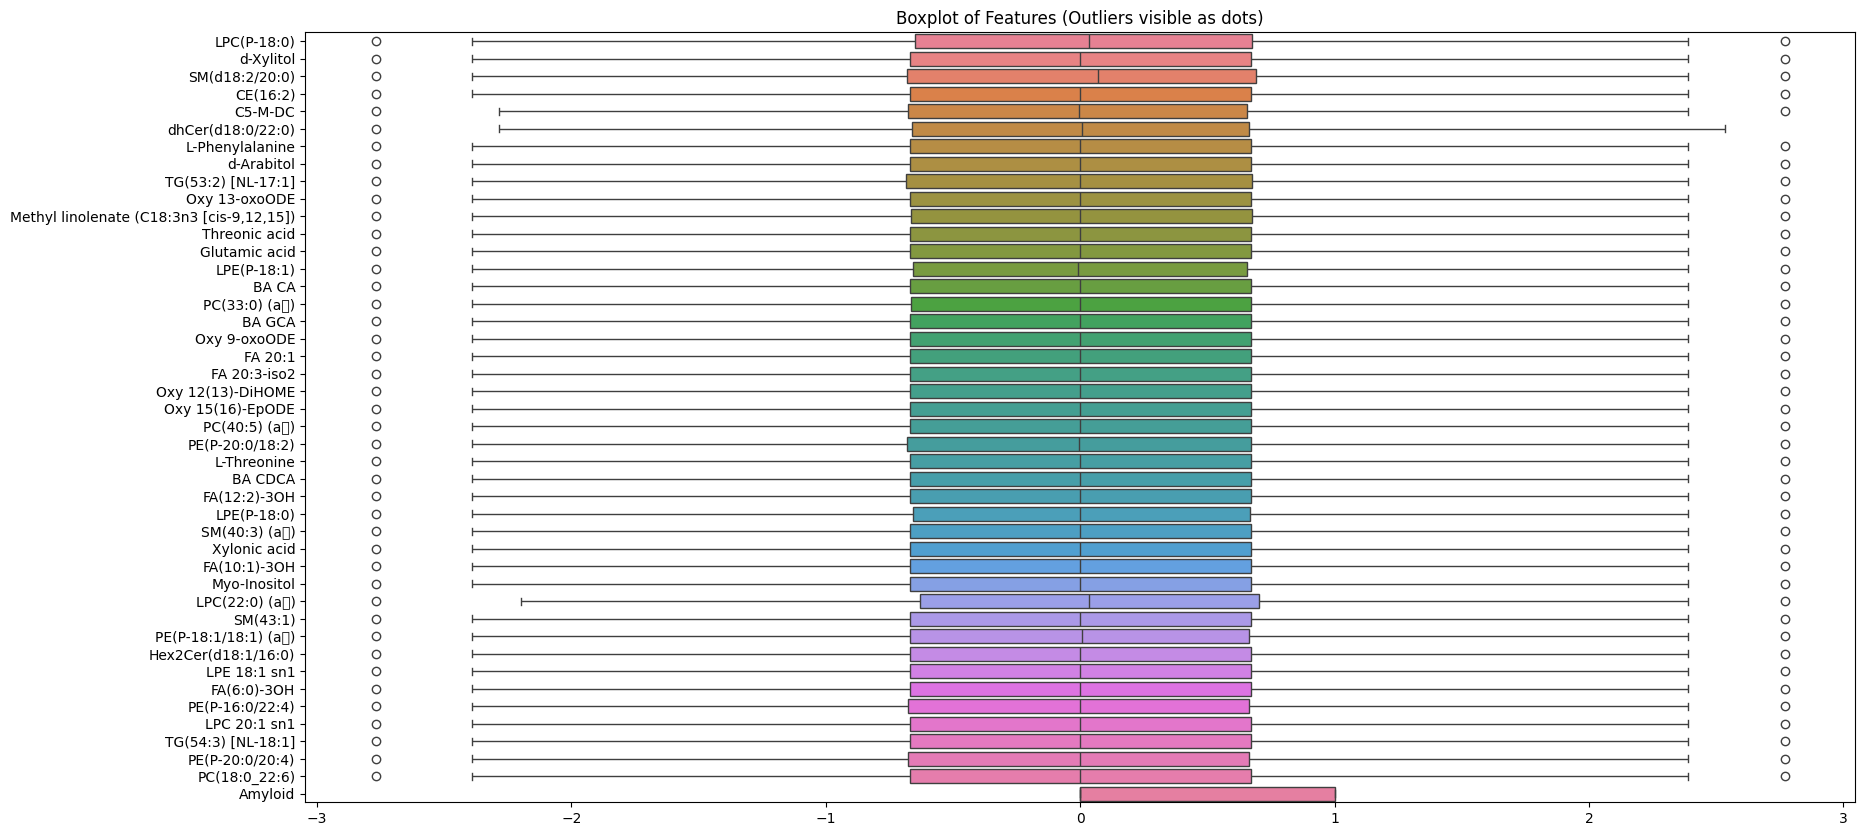

In [4]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot of Features (Outliers visible as dots)")
plt.show()

In [1]:
import pandas 

In [7]:
import pandas as pd
csv1 = pd.read_csv('albion_31-3.csv') 
csv1 = csv1.rename(columns={'ID': 'Client CODE'})
  # 150 rows
csv2 = pd.read_excel('albion_new.xlsx')    # 200 rows

# Merge on 'clientcode' to keep only common ones
merged = pd.merge(csv1, csv2[['Client CODE', 'MCI']], on='Client CODE', how='inner')

# Now `merged` contains rows with clientcodes in both, and the mci column from second CSV
# You can save or view it
merged.to_csv('output.csv', index=False)
print(merged.head())

   Client CODE    C5:1 LPE 22:5 sn2   FA 15:0  BA GLCA   BA LCA  BA TDCA  \
0         4393  0,0137      19,8911   93,0722  68,7554  32,4703  41,0997   
1         5111  0,0059      13,6263  174,4441  13,1209  27,4576  19,1686   
2         5369  0,0147      20,6533  347,0562  78,2369  40,4359  99,5111   
3         5419  0,0045       6,8783  230,6055   4,4219  11,2468   8,3642   
4         5455  0,0076      13,5259  207,9648   9,8698  18,9074   12,451   

  BA TUDCA/THDCA FA(12:2)-3OH FA(18:3)-3OH  ... H3 HADS_A1 E4a E19a weight2  \
0         3,9413         1,45       2,5705  ...  1       0   1    0      90   
1         0,5003       0,3236       1,8055  ...  2       0   1    0      81   
2         3,4325        1,093       3,7001  ...  5       0   1    2  88,672   
3          0,917       2,1044       1,9636  ...  5       0   3    0      62   
4         1,9134       9,6081       2,2922  ...  6       3   0    0  68,709   

  height2 FamilyHistory APOE Amyloid  MCI  
0     156             0 